#### OUTLINE

A.  Statement of Questions

B.  Data Loading and Preparation
1.  Address missing data
2.  Create Type
3.  Create DateTime columns (Year, Month, Hour), set index
4.  Bin Min Delay to Delay_Group

C.  Frequency of Delays
1.  Univariate Analyses
        a.  Code
        b.  Type
        c.  Line
        d.  Station
        e.  Year
        f.  Month
        g.  Day
        h.  Hour
2.  Bivariate Analyses
        a.  Year - others
        b.  Month - others
        c.  Day - others
        d.  Hour- others
        e.  Type - others
        f.  Station - others
3.  Multivariate Analyses

D.  Duration of Delays
1.  Univariate Analyses
        a.  Min Delay
        b.  Delay_Group
2.  Bivariate Analyses
        a.  Min Delay - others
        b.  Delay_Group - others
3.  Multivariate Analyses

E.  Forecasting
1.  Autocorrelation
2.  Linear Regression

F.  Summary of Findings

G.  Answers to Questions

H.  Recommendations


A.   Statement of Questions
1.  How does the time of the day impact the number and duration of delays?
2. Do certain types of delay occur more or less during specific hours of the day?
3.  Are there relationship(s) between the day of the week and the number and duration of delays?
4. Are there relationship(s) between the day of the week and the type of delays?
5. Are there relationship(s) between month and number and duration of delays?
6. Are there relationship(s) between month and type of delays?
7. Which of the lines are causing more delays over the years?
8. Which stations are experiencing delays and what type?
9. Can the number and duration of delays be predicted?

#### B. Data Loading and Preparation

In [174]:
import pandas as pd
import numpy as np
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from pandas.plotting import autocorrelation_plot
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
%matplotlib inline
ttc = pd.read_csv('TTC Delay 2017-2019.csv', sep=',', header =0)
ttccopy = ttc.copy()
ttc.head(20)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,12/1/19,00:23,Sunday,WARDEN STATION,MUSAN,5,10,E,BD,5117
1,12/1/19,00:59,Sunday,OLD MILL STATION,MUSAN,5,10,E,BD,5293
2,12/1/19,01:13,Sunday,BROADVIEW STATION,TUMVS,0,0,W,BD,5221
3,12/1/19,08:00,Sunday,BLOOR DANFORTH SUBWAY,MUO,0,0,NaN,BD,0
4,12/1/19,08:00,Sunday,BLOOR DANFORTH SUBWAY,MUO,0,0,NaN,BD,0
5,12/1/19,08:45,Sunday,BLOOR DANFORTH SUBWAY,TUST,0,0,E,BD,5091
6,12/1/19,09:00,Sunday,ST PATRICK STATION,TUSC,0,0,S,YU,6051
7,12/1/19,09:05,Sunday,VICTORIA PARK STATION,TUOS,0,0,W,BD,5368
8,12/1/19,09:15,Sunday,KIPLING STATION,EULT,3,8,E,BD,5009
9,12/1/19,09:40,Sunday,KIPLING STATION,PUSI,19,24,E,BD,5091


In [2]:
ttc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58844 entries, 0 to 58843
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       58844 non-null  object
 1   Time       58844 non-null  object
 2   Day        58844 non-null  object
 3   Station    58844 non-null  object
 4   Code       58843 non-null  object
 5   Min Delay  58844 non-null  int64 
 6   Min Gap    58844 non-null  int64 
 7   Bound      45714 non-null  object
 8   Line       58653 non-null  object
 9   Vehicle    58844 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 4.5+ MB


B.1. Address missing data and drop non-relevant columns

In [3]:
ttc['Vehicle'].value_counts().head()

0       15360
5741      192
5421      191
5976      174
5751      174
Name: Vehicle, dtype: int64

In [4]:
ttc.drop(columns = ['Min Gap', 'Bound', 'Vehicle'], inplace=True)
# Min Gap dropped because it was not deemed relevant
# Bound dropped because it had missing values that are bidirectional
#    and cannot be reliably imputed even with Line association
# Vehicle dropped because of significant number of'0' values 
#    that could mean missing values and 
#    for which data could not be reliably imputed

In [5]:
ttc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58844 entries, 0 to 58843
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       58844 non-null  object
 1   Time       58844 non-null  object
 2   Day        58844 non-null  object
 3   Station    58844 non-null  object
 4   Code       58843 non-null  object
 5   Min Delay  58844 non-null  int64 
 6   Line       58653 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.1+ MB


In [6]:
# percentage of missing values
( (ttc.isnull().sum()) / 58844 * 100).round(3) 

Date         0.000
Time         0.000
Day          0.000
Station      0.000
Code         0.002
Min Delay    0.000
Line         0.325
dtype: float64

In [7]:
# addressing Code missing value
ttc['Code'].fillna(ttc['Code'].agg(stat.mode), inplace=True)

In [8]:
ttc['Code'].isnull().sum()

0

In [9]:
# addressing Line missing values
ttc ['Line'].value_counts()

YU                        27502
BD                        26132
SRT                        2188
SHP                        1757
YU/BD                       920
B/D                          62
YU / BD                      25
YU/ BD                       14
YUS                           7
999                           5
YU - BD                       5
BD LINE                       4
BD/YU                         4
YU-BD                         3
16 MCCOWAN                    2
YU LINE                       2
11 BAYVIEW                    2
YU & BD                       1
RT                            1
YU\BD                         1
100 FLEMINGDON PARK           1
BLOOR DANFORTH LINES          1
134 PROGRESS                  1
32 EGLINTON WEST              1
BLOOR-DANFORTH                1
85 SHEPPARD EAST              1
YONGE UNIVERSITY SERVI        1
510 SPADINA                   1
YU - BD LINE                  1
46 MARTIN GROVE               1
22 COXWELL                    1
129 MCCO

In [10]:
ttc['Line'].replace(to_replace= (["YU/BD", 
                     "YU / BD", 
                     "YU/ BD", 
                    "BD/YU", 
                     "YU - BD", 
                     "YU-BD",
                        "YU BD", 
                    "YU & BD", 
                     "YU\BD", 
                     "YU - BD LINE"]),
                    value = "YU/BD/SHP", inplace=True)

In [11]:
ttc['Line'].replace(to_replace = [ "B/D", 
                        "BD LINE", 
                     "BLOOR DANFORTH LINES",
                     "BLOOR-DANFORTH"],
                    value = 'BD', inplace=True)

In [12]:
ttc['Line'].replace("RT", "SRT", inplace=True)

In [13]:
ttc['Line'].replace(to_replace = [ "YUS",
                    "YONGE UNIVERSITY SERVI",
                     "YU LINE"],
                   value= 'YU', inplace = True)

In [14]:
# combine the random one-off "lines" 
ttc['Line'].replace(to_replace= ( ['999', 
                                 '100 FLEMINGDON PARK',
                                 '11 BAYVIEW',
                                 '129 MCCOWAN NORTH',
                                 '134 PROGRESS',
                                 '16 MCCOWAN',
                                 '22 COXWELL',
                                 '32 EGLINTON WEST',
                                 '46 MARTIN GROVE',
                                 '510 SPADINA',
                                 '63 OSSINGTON',
                                 '704 RAD BUS',
                                 '85 SHEPPARD EAST',
                                 '985 SHEPPARD EAST EXPR']),
                    value= 'others', inplace=True)

In [15]:
ttc['Line'].value_counts()

YU           27512
BD           26200
SRT           2189
SHP           1757
YU/BD/SHP      975
others          20
Name: Line, dtype: int64

In [16]:
ttc['Line'].isnull().sum()

191

In [17]:
# addressing Line missing value
ttc['Line'].fillna(ttc['Line'].agg(stat.mode), inplace=True)

In [18]:
ttc.info()
# missing values filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58844 entries, 0 to 58843
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       58844 non-null  object
 1   Time       58844 non-null  object
 2   Day        58844 non-null  object
 3   Station    58844 non-null  object
 4   Code       58844 non-null  object
 5   Min Delay  58844 non-null  int64 
 6   Line       58844 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.1+ MB


#### B.4. Create Type from Code data

In [19]:
ttc['Code'].nunique()

201

In [20]:
# Create new attribute Type to facilitate generalization of analysis of 
# causes of delay

ttc["Type"]= ttc["Code"].replace({
    #Mechanical codes - subway
    "EUAC" : "Mechanical", "EUAL" : "Mechanical", "EUATC" : "Mechanical", "EUBK" : "Mechanical", "EUBO" : "Mechanical", 
    "EUCA" : "Mechanical", "EUCD" : "Mechanical", "EUCH" : "Mechanical", "EUCO" : "Mechanical", "EUDO" : "Mechanical", 
    "EUECD" : "Mechanical", "EUHV" : "Mechanical", "EULT" : "Mechanical", "EULV" : "Mechanical", "EUNEA" : "Mechanical", 
    "EUNT" : "Mechanical", "EUO" : "Mechanical", "EUOPO" : "Mechanical", "EUPI" : "Mechanical", "EUSC" : "Mechanical", 
    "EUTL" : "Mechanical", "EUTM" : "Mechanical", "EUTR" : "Mechanical", "EUTRD" : "Mechanical", "EUVA" : "Mechanical", 
    "EUVE" : "Mechanical", "EUYRD" : "Mechanical", "MUCL" : "Mechanical", "MUSC" : "Mechanical", "PUCBI" : "Mechanical", 
    "PUCSC" : "Mechanical", "PUCSS" : "Mechanical", "PUOPO" : "Mechanical", "PUSAC" : "Mechanical", "PUSBE" : "Mechanical", 
    "PUSCA" : "Mechanical", "PUSEA" : "Mechanical", "PUSTP" : "Mechanical", "PUTIJ" : "Mechanical", "PUTTP" : "Mechanical", 
    #Employee codes - subway
    "EUME" : "Employee", "EUOE" : "Employee", "MUEC" : "Employee", "MUESA" : "Employee", "MUIE" : "Employee", 
    "MULD" : "Employee", "MUNOA" : "Employee", "MUTD" : "Employee", "MUWR" : "Employee", "PUTCD" : "Employee", 
    "PUTOE" : "Employee", "SUAE" : "Employee", "TUATC" : "Employee", "TUCC" : "Employee", "TUDOE" : "Employee", 
    "TUKEY" : "Employee", "TUMVS" : "Employee", "TUNIP" : "Employee", "TUNOA" : "Employee", "TUOPO" : "Employee", 
    "TUOS" : "Employee", "TUS" : "Employee", "TUSC" : "Employee", "TUSET" : "Employee", "TUSUP" : "Employee", 
    #Signal codes - subway
    "MUATC" : "Signal", "PUATC" : "Signal", "PUDCS" : "Signal", "PUSCR" : "Signal", "PUSI" : "Signal", "PUSIO" : "Signal", 
    "PUSLC" : "Signal", "PUSNT" : "Signal", "PUSO" : "Signal", "PUSRA" : "Signal", "PUSTS" : "Signal", "PUSWZ" : "Signal", 
    "PUSZC" : "Signal", "PUTSC" : "Signal", 
    #Passenger codes - subway
    "MUD" : "Passenger", "MUDD" : "Passenger", "MUI" : "Passenger", "MUIR" : "Passenger", "MUIRS" : "Passenger", 
    "MUIS" : "Passenger", "MUODC" : "Passenger", "MUPAA" : "Passenger", "MUPR1" : "Passenger", "MUSAN" : "Passenger", 
    "PUMEL" : "Passenger", "PUMST" : "Passenger", "SUAP" : "Passenger", "SUBT" : "Passenger", "SUCOL" : "Passenger", 
    "SUDP" : "Passenger", "SUEAS" : "Passenger", "SUG" : "Passenger", "SUO" : "Passenger", "SUPOL" : "Passenger", 
    "SUROB" : "Passenger", "SUSA" : "Passenger", "SUSP" : "Passenger", "SUUT" : "Passenger", 
    #Track codes - subway
    "PUSSW" : "Track", "PUSTC" : "Track", "PUTD" : "Track", "PUTDN" : "Track", "PUTNT" : "Track", "PUTO" : "Track", 
    "PUTR" : "Track", "PUTS" : "Track", "PUTSM" : "Track", "PUTTC" : "Track", "PUTWZ" : "Track", 
    #Fire codes - subway
    "MUFS" : "Fire", "MUPLA" : "Fire", "MUPLB" : "Fire", "MUPLC" : "Fire", 
    #Weather codes - subway
    "MUWEA" : "Weather", "PUSIS" : "Weather", "PUTIS" : "Weather", "TUST" : "Weather", 
    #Other codes - subway
    "MUFM" : "Other", "MUGD" : "Other", "MUO" : "Other", "MUTO" : "Other", "PUMO" : "Other", "TUML" : "Other", 
    "TUO" : "Other", 
    #Mechanical codes - SRT
    "ERAC" : "Mechanical", "ERBO" : "Mechanical", "ERCD" : "Mechanical", "ERCO" : "Mechanical", "ERDB" : "Mechanical", 
    "ERDO" : "Mechanical", "ERHV" : "Mechanical", "ERLT" : "Mechanical", "ERLV" : "Mechanical", "ERNEA" : "Mechanical", 
    "ERNT" : "Mechanical", "ERO" : "Mechanical", "ERPR" : "Mechanical", "ERTC" : "Mechanical", "ERTL" : "Mechanical", 
    "ERTR" : "Mechanical", "ERVE" : "Mechanical", "ERWS" : "Mechanical", "PRSA" : "Mechanical", "PRSL" : "Mechanical", 
    #Employee codes - SRT
    "ERME" : "Employee", "MRCL" : "Employee", "MREC" : "Employee", "MRESA" : "Employee", "MRIE" : "Employee", 
    "MRLD" : "Employee", "MRNOA" : "Employee", "SRAE" : "Employee", "TRDOE" : "Employee", "TRNIP" : "Employee", 
    "TRNOA" : "Employee", "TRSET" : "Employee", "TRTC" : "Employee", 
    #Signal codes - SRT
    "ERRA" : "Signal", "ERWA" : "Signal", "MRTO" : "Signal", "PRSO" : "Signal", "PRSP" : "Signal", "PRSW" : "Signal", 
    "PRTST" : "Signal", 
    #Passenger codes - SRT
    "MRD" : "Passenger", "MRDD" : "Passenger", "MRPAA" : "Passenger", "MRPR1" : "Passenger", "MRSAN" : "Passenger", 
    "MRUI" : "Passenger", "MRUIR" : "Passenger", "PREL" : "Passenger", "PRST" : "Passenger", "SRAP" : "Passenger", 
    "SRBT" : "Passenger", "SRCOL" : "Passenger", "SRDP" : "Passenger", "SREAS" : "Passenger", "SRO" : "Passenger", 
    "SRSA" : "Passenger", "SRSP" : "Passenger", "SRUT" : "Passenger", 
    #Track codes - SRT
    "ERTB" : "Track", "MRSTM" : "Track", "PRW" : "Track", 
    #Fire codes - SRT
    "MRFS" : "Fire", "MRPLA" : "Fire", "MRPLB" : "Fire", "MRPLC" : "Fire", 
    #Weather codes - SRT
    "MRWEA" : "Weather", "TRST" : "Weather", 
    #Other codes - SRT
    "MRO" : "Other", "PRO" : "Other", "PRS" : "Other", "TRO" : "Other", 
    #Unknown codes - all
    "MUNCA" : "Unknown", "TRNCA" : "Unknown", "PUEO" : "Unknown", "PUEWZ" : "Unknown", "MUPF" : "Unknown", 
    "TUNCA" : "Unknown", "XXXXX" : "Unknown", "STO" : "Unknown", "STDP" : "Unknown", "MTO" : "Unknown", 
    "MUCSA" : "Unknown", "PUEME" : "Unknown"
                                             })

#### B.5. Create DateTime, set index

In [21]:
# converting to datetime dtype and setting as index
ttc['DateTime'] = pd.to_datetime(ttc['Date'] + ' ' + ttc['Time'])
ttc.head()

,Date,Time,Day,Station,Code,Min Delay,Line,Type,DateTime
0,12/1/19,00:23,Sunday,WARDEN STATION,MUSAN,5,BD,Passenger,2019-12-01 00:23:00
1,12/1/19,00:59,Sunday,OLD MILL STATION,MUSAN,5,BD,Passenger,2019-12-01 00:59:00
2,12/1/19,01:13,Sunday,BROADVIEW STATION,TUMVS,0,BD,Employee,2019-12-01 01:13:00
3,12/1/19,08:00,Sunday,BLOOR DANFORTH SUBWAY,MUO,0,BD,Other,2019-12-01 08:00:00
4,12/1/19,08:00,Sunday,BLOOR DANFORTH SUBWAY,MUO,0,BD,Other,2019-12-01 08:00:00


In [22]:
ttc.drop(columns = ['Date', 'Time'], inplace=True)

In [23]:
ttc.set_index(ttc['DateTime'], inplace=True)
ttc.head(2)

,Day,Station,Code,Min Delay,Line,Type,DateTime
DateTime,,,,,,,
2019-12-01 00:23:00,Sunday,WARDEN STATION,MUSAN,5,BD,Passenger,2019-12-01 00:23:00
2019-12-01 00:59:00,Sunday,OLD MILL STATION,MUSAN,5,BD,Passenger,2019-12-01 00:59:00


In [24]:
#ttc.drop(columns = 'DateTime', inplace=True)
## found that if column dropped, lambda code below won't work

In [25]:
# assigning new time attributes for analysis
ttc['Year'] = ttc['DateTime'].apply(lambda x: x.year)
ttc['Month'] = ttc['DateTime'].apply(lambda x: x.month)
ttc['Hour'] = ttc['DateTime'].apply(lambda x: x.hour)
ttc.head(2)

,Day,Station,Code,Min Delay,Line,Type,DateTime,Year,Month,Hour
DateTime,,,,,,,,,,
2019-12-01 00:23:00,Sunday,WARDEN STATION,MUSAN,5,BD,Passenger,2019-12-01 00:23:00,2019,12,0
2019-12-01 00:59:00,Sunday,OLD MILL STATION,MUSAN,5,BD,Passenger,2019-12-01 00:59:00,2019,12,0


#### B.6.  Binning Min Delay to Delay_Group

In [26]:
ttc['Min Delay'].value_counts().head()

0    39428
3     6605
4     3606
5     3170
6     1381
Name: Min Delay, dtype: int64

In [27]:
# Create new variable 'Delay_Group' to 
# categorize delay duration into 5 minute bins.
# Isolating '0' because:
#    1.  Delays less than a minute is hardly felt as a delay by customers 
#          (but data is significant for system operations)
#    2.  Number of '0' is predominant in the distribution
#    3.  Number '0' could reflect missing values, similar to Vehicle,
#          thus, this data should be analyzed and interpreted with caution

delay_bins = [-0.1, 0, 4, 9, 14, 19, 24, 29, 44, 59, 119, 600]
ttc['Delay_Group'] = pd.cut(ttc['Min Delay'], delay_bins, 
                               labels=['0','1- 5', '5-9', '10-14', '15-19', '20-24', 
                                        '25-29', '30-44', '45-59', '60-119', 'over 120'])

#### *Prepared Data*

In [28]:
ttc.head()

,Day,Station,Code,Min Delay,Line,Type,DateTime,Year,Month,Hour,Delay_Group
DateTime,,,,,,,,,,,
2019-12-01 00:23:00,Sunday,WARDEN STATION,MUSAN,5,BD,Passenger,2019-12-01 00:23:00,2019,12,0,5-9
2019-12-01 00:59:00,Sunday,OLD MILL STATION,MUSAN,5,BD,Passenger,2019-12-01 00:59:00,2019,12,0,5-9
2019-12-01 01:13:00,Sunday,BROADVIEW STATION,TUMVS,0,BD,Employee,2019-12-01 01:13:00,2019,12,1,0
2019-12-01 08:00:00,Sunday,BLOOR DANFORTH SUBWAY,MUO,0,BD,Other,2019-12-01 08:00:00,2019,12,8,0
2019-12-01 08:00:00,Sunday,BLOOR DANFORTH SUBWAY,MUO,0,BD,Other,2019-12-01 08:00:00,2019,12,8,0


In [29]:
ttc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58844 entries, 2019-12-01 00:23:00 to 2019-11-30 23:28:00
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day          58844 non-null  object        
 1   Station      58844 non-null  object        
 2   Code         58844 non-null  object        
 3   Min Delay    58844 non-null  int64         
 4   Line         58844 non-null  object        
 5   Type         58844 non-null  object        
 6   DateTime     58844 non-null  datetime64[ns]
 7   Year         58844 non-null  int64         
 8   Month        58844 non-null  int64         
 9   Hour         58844 non-null  int64         
 10  Delay_Group  58844 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(4), object(5)
memory usage: 5.0+ MB


#### C.  FREQUENCY of Delays
####     1. UNIVARIATE Analyses
####        a. CODE

In [30]:
ttc['Code'].unique()

array(['MUSAN', 'TUMVS', 'MUO', 'TUST', 'TUSC', 'TUOS', 'EULT', 'PUSI',
       'MUIS', 'EUAC', 'MRTO', 'MUSC', 'MUIRS', 'SUSA', 'SUDP', 'MUPAA',
       'PUMEL', 'SRDP', 'EUBK', 'MUATC', 'MUI', 'PUMO', 'SUG', 'MUNCA',
       'MRO', 'MUTO', 'MUCL', 'MUPLB', 'MUIR', 'PUTSC', 'SUAP', 'PUEO',
       'MUIE', 'TUSUP', 'PUSSW', 'TUNIP', 'SUUT', 'TUO', 'SUO', 'SUAE',
       'ERCO', 'MUTD', 'MUGD', 'EUSC', 'MUD', 'MUWEA', 'MUDD', 'PUTWZ',
       'TUS', 'TUATC', 'ERLV', 'PUMST', 'EUDO', 'EUVA', 'EULV', 'SUEAS',
       'EUTR', 'EUCD', 'TUSET', 'TUCC', 'EUYRD', 'MRPAA', 'SUCOL', 'SRAP',
       'PUSNT', 'MRD', 'SUBT', 'ERTC', 'SUROB', 'PUSTS', 'EUPI', 'EUBO',
       'MRUIR', 'PUCSC', 'EUTRD', 'TRNIP', 'EUME', 'PUOPO', 'TRO', 'ERDO',
       'SUPOL', 'PUTDN', 'EUVE', 'PUTD', 'PUSWZ', 'SREAS', 'EUNT',
       'TUNOA', 'PUSAC', 'TUKEY', 'MRUI', 'TUDOE', 'PRO', 'PRSA', 'MUPR1',
       'PRSO', 'PRTST', 'EUATC', 'EUCO', 'MRWEA', 'PUTTC', 'EUOE',
       'MUNOA', 'PUSTC', 'SRCOL', 'TRTC', 'PUTO', 'ERNT', 'MUP

In [31]:
code_val = ttc['Code'].value_counts()
code_perc = ( (code_val / 58844) *100 ).round(2)
code = pd.concat( [code_val, code_perc], keys = ['Frequency', '%'], axis =1)
code.head()

,Frequency,%
MUSC,7617,12.94
TUSC,5004,8.50
MUIS,4844,8.23
MUPAA,4241,7.21
SUDP,2984,5.07


In [32]:
# MUSC - miscellaneous speed control
# TUSC - operator overspeeding
# MUIS - injured or ill customer in station, transported

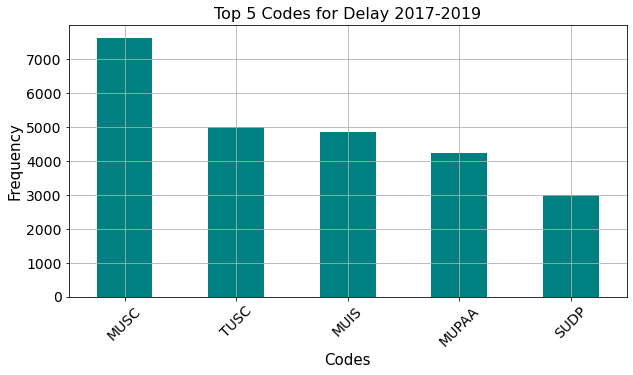

In [33]:
ttc['Code'].value_counts().head(5).plot(kind='bar', 
    figsize=(10,5), rot=45, grid=True, color='teal', fontsize = 14)
plt.xlabel('Codes', size = 15)
plt.ylabel('Frequency', size =15)
plt.title('Top 5 Codes for Delay 2017-2019', size=16);

In [34]:
# Findings:
#  Code - the causes of delays are varied, with the most common being
#       MUSC (miscellaneous speed control) at 12.9%,
#       followed by TUSC (operator speeding) at 8.5%

#### C.1.b   Frequency of Delays : UNIVARIATE:  TYPE

In [35]:
type_val = ttc['Type'].value_counts()
type_perc = ( (type_val / 58844) *100 ).round(2)
type = pd.concat( [type_val, type_perc], keys = ['Frequency', '%'], axis =1)
type

,Frequency,%
Passenger,23668,40.22
Mechanical,13247,22.51
Employee,10255,17.43
Other,5991,10.18
Signal,2788,4.74
Unknown,1079,1.83
Track,905,1.54
Weather,550,0.93
Fire,361,0.61


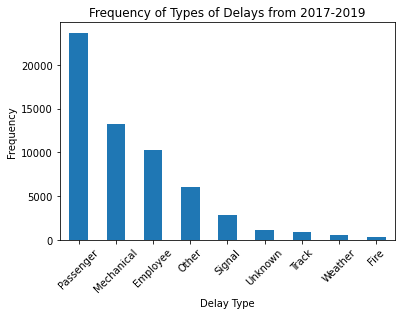

In [36]:
ttc['Type'].value_counts().plot(kind = 'bar', rot = 45)
plt.xlabel('Delay Type')
plt.ylabel('Frequency')
plt.title('Frequency of Types of Delays from 2017-2019');

In [37]:
# Findings:
# Type - the most common type of delay is Passenger-associated, at 40.2%,
#        followed by Mechanical and Employee types at 22.5% and 17.4%, respectively

#### C.1.c.  Frequency of Delays: UNIVARIATE: LINE

In [38]:
line_val = ttc['Line'].value_counts()
line_perc = ( (line_val / 58844) *100 ).round(2)
line = pd.concat( [line_val, line_perc], keys = ['Frequency', '%'], axis =1)
line

,Frequency,%
YU,27703,47.08
BD,26200,44.52
SRT,2189,3.72
SHP,1757,2.99
YU/BD/SHP,975,1.66
others,20,0.03


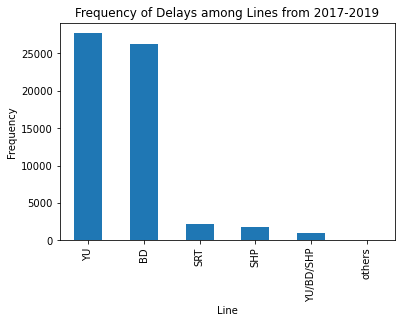

In [39]:
ttc['Line'].value_counts().plot(kind = 'bar')
plt.xlabel('Line')
plt.ylabel('Frequency')
plt.title('Frequency of Delays among Lines from 2017-2019');

In [40]:
# Findings:
#  Line - the line most associated with delays are the Yonge-University line,
#         causing delays 47% of the time, followed closely by the 
#         Bloor-Danforth line at 44.5%

#### C.1.d.  Frequency of Delays:  UNIVARIATE: STATION

In [41]:
ttc['Station'].unique()

array(['WARDEN STATION', 'OLD MILL STATION', 'BROADVIEW STATION',
       'BLOOR DANFORTH SUBWAY', 'ST PATRICK STATION',
       'VICTORIA PARK STATION', 'KIPLING STATION', 'LESLIE STATION',
       'ST CLAIR STATION', 'PIONEER VILLAGE STATIO', 'JANE STATION',
       'MCCOWAN STATION', 'COXWELL STATION', 'LAWRENCE STATION',
       'NORTH YORK CTR STATION', 'SCARBOROUGH CTR STATIO',
       'YUS/BD/SHEPPARD SUBWAY', 'YORK MILLS STATION',
       'YORK UNIVERSITY STATIO', 'SUMMERHILL STATION',
       'LAWRENCE WEST STATION', 'OSSINGTON STATION',
       'WILSON HOSTLER SOUTHBO', 'SHEPPARD STATION', 'ST ANDREW STATION',
       'QUEEN STATION', 'SCARBOROUGH RAPID TRAN', 'SHEPPARD WEST STATION',
       'BLOOR STATION', 'WILSON STATION', 'MAIN STREET STATION',
       'DUNDAS WEST STATION', 'MUSEUM STATION', 'SPADINA YUS STATION',
       'WELLESLEY STATION', 'CHESTER STATION', 'EGLINTON STATION',
       'YORKDALE STATION', 'YONGE BD STATION', 'ST GEORGE BD STATION',
       'DAVISVILLE STATION', 'KE

In [42]:
stn_val = ttc['Station'].value_counts()
stn_perc = ( (stn_val / 58844) *100 ).round(2)
stn = pd.concat( [stn_val, stn_perc], keys = ['Frequency', '%'], axis =1)
stn.head(10)

,Frequency,%
KENNEDY BD STATION,2697,4.58
KIPLING STATION,2607,4.43
FINCH STATION,2230,3.79
SHEPPARD WEST STATION,1591,2.70
WILSON STATION,1451,2.47
BLOOR STATION,1447,2.46
ISLINGTON STATION,1371,2.33
WARDEN STATION,1370,2.33
EGLINTON STATION,1352,2.30
COXWELL STATION,1232,2.09


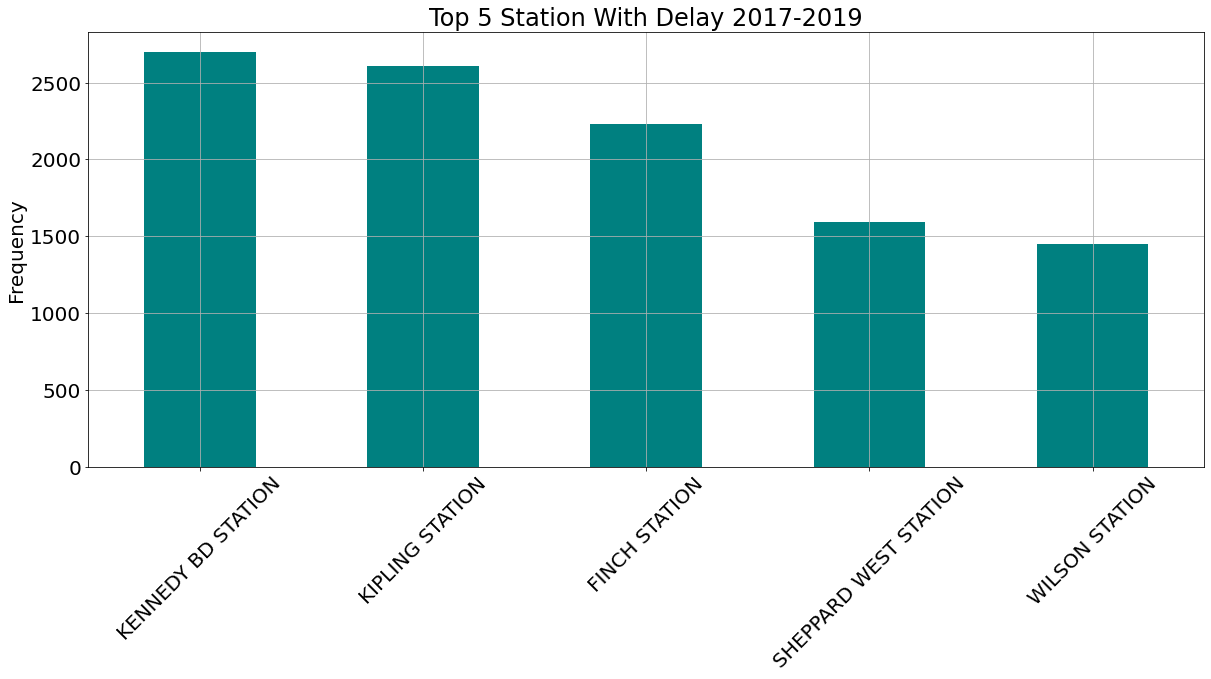

In [43]:
ttc['Station'].value_counts().head(5).plot(kind='bar', 
    figsize=(20,8), rot=45, grid=True, color='teal', fontsize = 20)
#plt.xlabel('Station', size = 22)
plt.ylabel('Frequency', size =20)
plt.title('Top 5 Station With Delay 2017-2019', size=24);

In [44]:
# Findings:
#  Station - there are numerous stations on the Lines.
#          - there is a trend of twice the number of delays on
#          - the terminal stations of Kennedy and Kipling (BD Line),
#          - and Finch (YU), at 4.58%, 4.43% and 3.79% respectively.
#          - But this does not seem to be significantly higher than others.

#### C.1.e.  Frequency of Delays:  UNIVARIATE: YEAR

In [45]:
ttcY_val = ttc['Year'].value_counts().sort_index()
ttcY_perc = ( (ttcY_val / 58844) *100).round(2)
ttcY = pd.concat( [ttcY_val, ttcY_perc], 
                 keys = ['Frequency','%'], axis =1)
ttcY

,Frequency,%
2017,18885,32.09
2018,20737,35.24
2019,19222,32.67


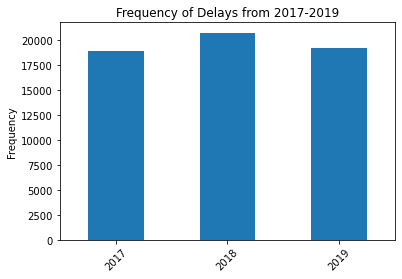

In [46]:
ttc['Year'].value_counts().sort_index().plot(kind = 'bar', rot=45)
#plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Delays from 2017-2019');

In [47]:
# Findings:
#  Year - among the three years analyzed, there 2018 showed the highest 
#         share of delays at 35.2$, but this does not seem to be
#         significantly different from the two other years

#### C.1.f.  Frequency of Delays: UNIVARIATE: MONTH

In [48]:
ttcM_val = ttc['Month'].value_counts().sort_index()
ttcM_perc = ( (ttcM_val / 58844) * 100).round(2)
ttcM = pd.concat([ttcM_val, ttcM_perc], keys = ['Frequency', '%'], axis=1)
ttcM

,Frequency,%
1,5266,8.95
2,4468,7.59
3,4679,7.95
4,4626,7.86
5,5100,8.67
6,4966,8.44
7,5078,8.63
8,5148,8.75
9,4803,8.16
10,4904,8.33


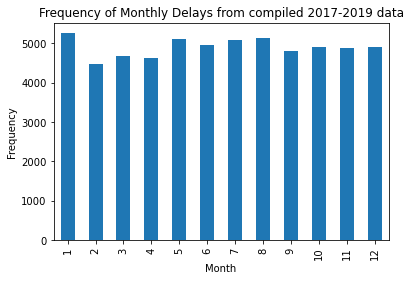

In [49]:
ttc['Month'].value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Monthly Delays from compiled 2017-2019 data');

In [50]:
# Findings:
#  Month - there appears to be a trend of less delays during the
#          late winter- mid spring months of February to April
#        - there seem to be a slightly higher frequency during the 
#          late spring- summer months from May to August
#        - the highest percentage of delays occur in January at 8.95%,
#          but this does not seem to be a significant difference

#### C.1.g. Frequency of Delays: UNIVARIATE: DAY of the WEEK

In [51]:
day_seq = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ttcD_val = ttc['Day'].value_counts().reindex(day_seq, axis = 'columns')
ttcD_perc = ( (ttcD_val / 58844) * 100).round(2)
ttcD = pd.concat([ttcD_val, ttcD_perc], keys = ['Frequency', '%'], axis=1)
ttcD

,Frequency,%
Monday,9179,15.60
Tuesday,9158,15.56
Wednesday,9205,15.64
Thursday,9280,15.77
Friday,9292,15.79
Saturday,6820,11.59
Sunday,5910,10.04


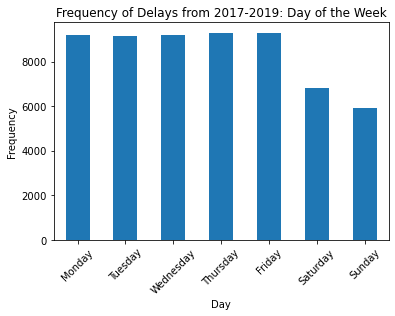

In [52]:
ttc['Day'].value_counts().reindex(day_seq, axis= 'columns').plot(kind = 'bar', rot=45)
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Frequency of Delays from 2017-2019: Day of the Week');

In [53]:
# Findings:
#  Day - there seems to be an equivalent percentage of delays during the weekdays (about 15%)
#      - there are less delays during the weekends, particularly Sunday,
#        which could be significantly different from those of the weekdays'

#### C.1.h  Frequency of Delays: UNIVARIATE: HOUR

In [54]:
ttcH_val = ttc['Hour'].value_counts().sort_values(ascending=False)
ttcH_perc = ( (ttcH_val / 58844) * 100).round(2)
ttcH = pd.concat([ttcH_val, ttcH_perc], keys = ['Frequency', '%'], axis=1)
ttcH.head()

,Frequency,%
8,4159,7.07
17,3760,6.39
16,3488,5.93
6,3395,5.77
22,3307,5.62


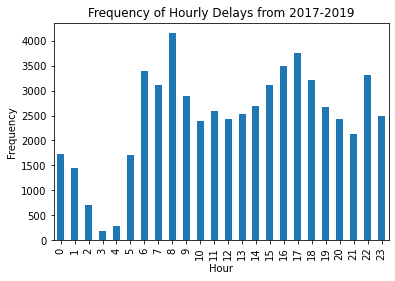

In [55]:
ttc['Hour'].value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Frequency of Hourly Delays from 2017-2019');

In [172]:
ttc [ (ttc['Hour']==2)  & (ttc['Min Delay'] >0) ].head(10)
# TUCC - transit control related problems
# MUATC - ATC project
# SUO - passenger other
# PUTOE - T&S operator related problems
# SUCOL - collector booth alarm activated
# SUUT - unauthorized at track level

,Day,Station,Code,Min Delay,Line,Type,DateTime,Year,Month,Hour,Delay_Group
DateTime,,,,,,,,,,,
2019-12-06 02:19:00,Friday,KIPLING STATION,TUCC,10,BD,Employee,2019-12-06 02:19:00,2019,12,2,10-14
2019-12-16 02:45:00,Monday,HIGHWAY 407 STATION,MUATC,9,YU,Signal,2019-12-16 02:45:00,2019,12,2,5-9
2019-07-19 02:03:00,Friday,YORK MILLS STATION,SUO,9,YU,Passenger,2019-07-19 02:03:00,2019,7,2,5-9
2019-09-12 02:02:00,Thursday,DAVISVILLE STATION,PUTOE,5,YU,Employee,2019-09-12 02:02:00,2019,9,2,5-9
2019-09-17 02:18:00,Tuesday,HIGHWAY 407 STATION,SUCOL,5,YU,Passenger,2019-09-17 02:18:00,2019,9,2,5-9
2019-09-20 02:00:00,Friday,YORK MILLS STATION,SUUT,11,YU,Passenger,2019-09-20 02:00:00,2019,9,2,10-14
2019-09-23 02:34:00,Monday,SHEPPARD-YONGE STATION,TUMVS,4,SHP,Employee,2019-09-23 02:34:00,2019,9,2,1- 5
2019-10-20 02:00:00,Sunday,WARDEN STATION,SUUT,5,BD,Passenger,2019-10-20 02:00:00,2019,10,2,5-9
2018-09-12 02:06:00,Wednesday,VAUGHAN MC STATION,MUWR,11,YU,Employee,2018-09-12 02:06:00,2018,9,2,10-14


In [173]:
ttc [ (ttc['Hour']==3)  & (ttc['Min Delay'] >0) ].head(10)
# TUO - transportation department - other
# MUI - injured or ill customer (on train)
# TUNOA - no operator immediately available
# MUATC - ATC project
# EUATC - ATC RC&S equipment

,Day,Station,Code,Min Delay,Line,Type,DateTime,Year,Month,Hour,Delay_Group
DateTime,,,,,,,,,,,
2019-07-30 03:09:00,Tuesday,SHEPPARD-YONGE STATION,TUO,5,SHP,Other,2019-07-30 03:09:00,2019,7,3,5-9
2018-01-01 03:06:00,Monday,WARDEN STATION,MUI,3,BD,Passenger,2018-01-01 03:06:00,2018,1,3,1- 5
2018-08-02 03:13:00,Thursday,KEELE STATION,TUNOA,3,BD,Employee,2018-08-02 03:13:00,2018,8,3,1- 5
2019-01-01 03:03:00,Tuesday,DUPONT STATION,MUATC,11,YU,Signal,2019-01-01 03:03:00,2019,1,3,10-14
2019-01-01 03:08:00,Tuesday,EGLINTON WEST STATION,EUATC,11,YU,Mechanical,2019-01-01 03:08:00,2019,1,3,10-14
2019-01-01 03:09:00,Tuesday,DUPONT STATION,EUATC,6,YU,Mechanical,2019-01-01 03:09:00,2019,1,3,5-9
2019-01-01 03:26:00,Tuesday,ST CLAIR WEST STATION,EUATC,4,YU,Mechanical,2019-01-01 03:26:00,2019,1,3,1- 5
2017-01-01 03:00:00,Sunday,LAWRENCE STATION,EUDO,4,YU,Mechanical,2017-01-01 03:00:00,2017,1,3,1- 5


In [56]:
# Findings:
#  Hour - the delays seem to clustered around the rush hours of 
#         6-9am (peaking at 8am), and 3-6pm (peaking at 5pm)
#       - there seems to be a significantly decreased number of delays
#         during the dead hours of the night, troughing at 3-4am,
#         and rapidly increasing towards early morning at 5am

In [57]:
# Summary of UNIVARIATE Analyses Findings for FREQUENCY of Delay:
#
#  Code - the causes of delays are varied, with the most common being
#       MUSC (miscellaneous speed control) at 12.9%, 
#       followed by TUSC (operator overspeeding) at 8.5%
#  Type - the most common type of delay is Passenger-associated, at 40.2%,
#        followed by Mechanical and Employee types at 22.5% and 17.4%, respectively
#  Line - the line most associated with delays are the Yonge-University line,
#         causing delays 47% of the time, followed closely by the 
#         Bloor-Danforth line at 44.5%
#  Station - there are numerous stations on the Lines.
#          - there is a trend of twice the number of delays on
#          - the terminal stations of Kennedy and Kipling (BD Line),
#          - and Finch (YU), at 4.58%, 4.43% and 3.79% respectively.
#          - But this does not seem to be significantly higher than others.
#  Year - among the three years analyzed, 2018 showed the highest 
#         share of delays at 35.2$, but this does not seem to be
#         significantly different from the two other years
#  Month - there appears to be a trend of less delays during the
#          late winter- mid spring months of February to April
#        - there seem to be a slightly higher frequency during the 
#          late spring- summer months from May to August
#        - the highest percentage of delays occur in January at 8.95%,
#          but this does not seem to be a significant difference
#  Day - there seems to be an equivalent percentage of delays during the weekdays (about 15%)
#      - there are less delays during the weekends, particularly Sunday,
#        which could be significantly different from those of the weekdays'
#  Hour - the delays seem to clustered around the rush hours of 
#         6-9am (peaking at 8am), and 3-6pm (peaking at 5pm)
#       - there seems to be a significantly decreased number of delays
#         during the dead hours of the night, troughing at 3-4am,
#         and rapidly increasing towards early morning at 5am

#### C.  FREQUENCY of Delays
####     2.  BIVARIATE Analyses
####        a.  YEAR - others

####  C.2.a.i.  Frequency of Delay: BIVARIATE:  YEAR - MONTH

In [58]:
yr_mo_val = ttc.groupby('Year')['Month'].value_counts()
yr_mo_ct = ttc.groupby('Year')['Month'].count()
yr_mo_grpperc = ((yr_mo_val / yr_mo_ct)*100).round(2)
yr_mo_overall = ( (yr_mo_val/ 58844)*100).round(2)
yr_mo = pd.concat( [yr_mo_val, yr_mo_grpperc, yr_mo_overall], keys = ['Frequency','% for the Year','% over 3 Years'], axis =1)
yr_mo

Frequency  % for the Year  % over 3 Years
Year Month                                           
2017 12          1881            9.96            3.20
     11          1685            8.92            2.86
     5           1634            8.65            2.78
     10          1605            8.50            2.73
     8           1581            8.37            2.69
     6           1568            8.30            2.66
     3           1555            8.23            2.64
     1           1522            8.06            2.59
     7           1497            7.93            2.54
     4           1479            7.83            2.51
     9           1478            7.83            2.51
     2           1400            7.41            2.38
2018 8           1937            9.34            3.29
     7           1885            9.09            3.20
     1           1873            9.03            3.18
     10          1802            8.69            3.06
     6           1794            8.65            3.05
     9           1794            8.65            3.05
     5           1761            8.49            2.99
     11          1738            8.38            2.95
     3           1621            7.82            2.75
     4           1597            7.70            2.71
     2           1470            7.09            2.50
     12          1465            7.06            2.49
2019 1           1871            9.73            3.18
     5           1705            8.87            2.90
     7           1696            8.82            2.88
     8           1630            8.48            2.77
     6           1604            8.34            2.73
     2           1598            8.31            2.72
     12          1574            8.19            2.67
     4           1550            8.06            2.63
     9           1531            7.96            2.60
     3           1503            7.82            2.55
     10          1497            7.79            2.54
     11          1463            7.61            2.49

<ipython-input-59-c6403a16220b>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,1,1)


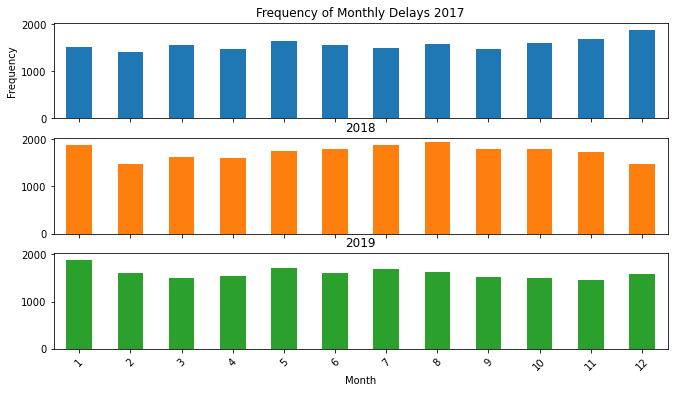

In [59]:
ttc.groupby('Month')['Year'].value_counts().unstack().plot(kind='bar', 
        figsize=(11, 6), subplots=True, legend=False, rot=45, sharey=True)

plt.subplot(3,1,1)
plt.title('Frequency of Monthly Delays 2017')
plt.ylabel('Frequency');

In [60]:
# Findings:
#  Year - Month - there does not appear to be a pattern of delay
#                 occurence among the months through the three years

####  C.2.a.ii.  Frequency of Delay: BIVARIATE:  YEAR - TYPE of Delay

In [61]:
yr_type_val = ttc.groupby('Year')['Type'].value_counts()
yr_type_ct = ttc.groupby('Year')['Type'].count()
yr_type_grpperc = ((yr_type_val / yr_type_ct)*100).round(2)
yr_type_overall = ( (yr_type_val/ 58844)*100).round(2)
yr_type = pd.concat( [yr_type_val, yr_type_grpperc, yr_type_overall], keys = ['Frequency','% for the Year','% over 3 Years'], axis =1)
yr_type

Frequency  % for the Year  % over 3 Years
Year Type                                                 
2017 Passenger        7044           37.30           11.97
     Mechanical       4983           26.39            8.47
     Employee         3243           17.17            5.51
     Other            1889           10.00            3.21
     Signal            873            4.62            1.48
     Unknown           301            1.59            0.51
     Track             291            1.54            0.49
     Fire              132            0.70            0.22
     Weather           129            0.68            0.22
2018 Passenger        8297           40.01           14.10
     Mechanical       4433           21.38            7.53
     Employee         3897           18.79            6.62
     Other            2133           10.29            3.62
     Signal            917            4.42            1.56
     Unknown           462            2.23            0.79
     Track             333            1.61            0.57
     Weather           147            0.71            0.25
     Fire              118            0.57            0.20
2019 Passenger        8327           43.32           14.15
     Mechanical       3831           19.93            6.51
     Employee         3115           16.21            5.29
     Other            1969           10.24            3.35
     Signal            998            5.19            1.70
     Unknown           316            1.64            0.54
     Track             281            1.46            0.48
     Weather           274            1.43            0.47
     Fire              111            0.58            0.19

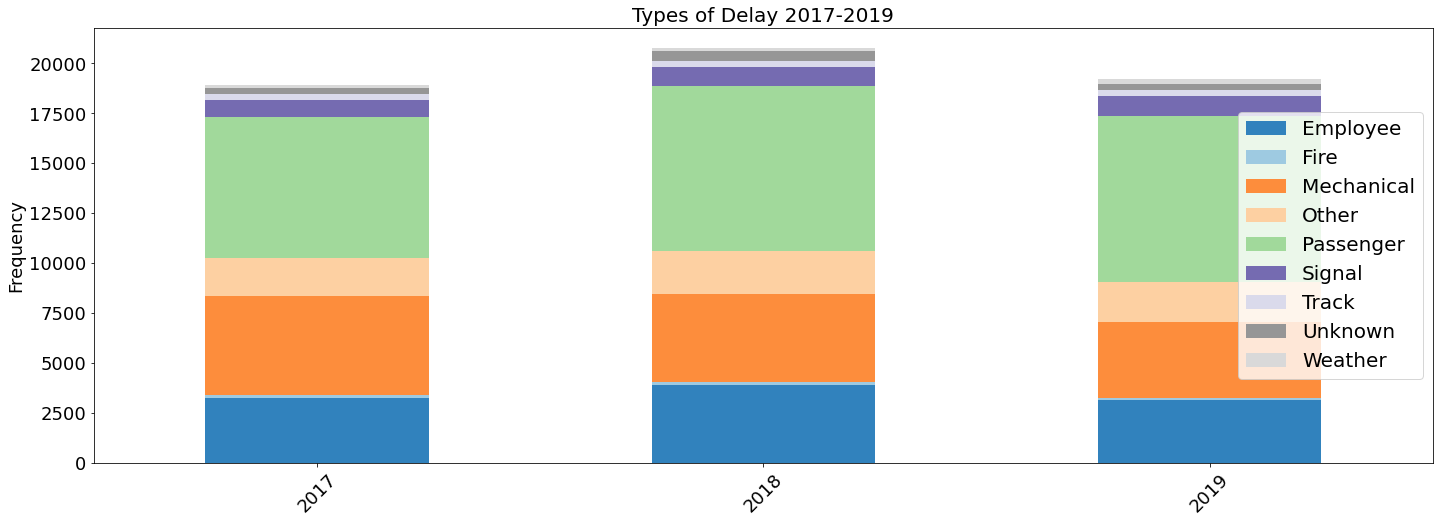

In [62]:
yr_ty_val2 = ttc.groupby('Year')['Type'].value_counts().unstack()
yr_ty_val2.plot.bar(figsize=(24, 8), fontsize=18, rot=45, cmap= 'tab20c',
        stacked=True)
plt.xlabel(None)
plt.ylabel('Frequency', size=18)
plt.title('Types of Delay 2017-2019', size=20)
plt.legend(fontsize = 20, loc = 'right');

In [63]:
# Findings:
#  Year - Type  -  Passenger-associated delays are consistently predominant
#                  over the three years, followed by Mechanical causes

####  C.2. a. iii  Frequency of Delay: BIVARIATE:  YEAR - LINE 

In [64]:
yr_line_val = ttc.groupby('Year')['Line'].value_counts()
yr_line_ct = ttc.groupby('Year')['Line'].count()
yr_line_grpperc = ((yr_line_val / yr_line_ct)*100).round(2)
yr_line_overall = ( (yr_line_val/ 58844)*100).round(2)
yr_line = pd.concat( [yr_line_val, yr_line_grpperc, yr_line_overall], keys = ['Frequency','% for the Year','% over 3 Years'], axis =1)
yr_line

Frequency  % for the Year  % over 3 Years
Year Line                                                
2017 BD              8877           47.01           15.09
     YU              8362           44.28           14.21
     SRT              772            4.09            1.31
     SHP              645            3.42            1.10
     YU/BD/SHP        222            1.18            0.38
     others             7            0.04            0.01
2018 YU             10009           48.27           17.01
     BD              9120           43.98           15.50
     SRT              717            3.46            1.22
     SHP              512            2.47            0.87
     YU/BD/SHP        373            1.80            0.63
     others             6            0.03            0.01
2019 YU              9332           48.55           15.86
     BD              8203           42.68           13.94
     SRT              700            3.64            1.19
     SHP              600            3.12            1.02
     YU/BD/SHP        380            1.98            0.65
     others             7            0.04            0.01

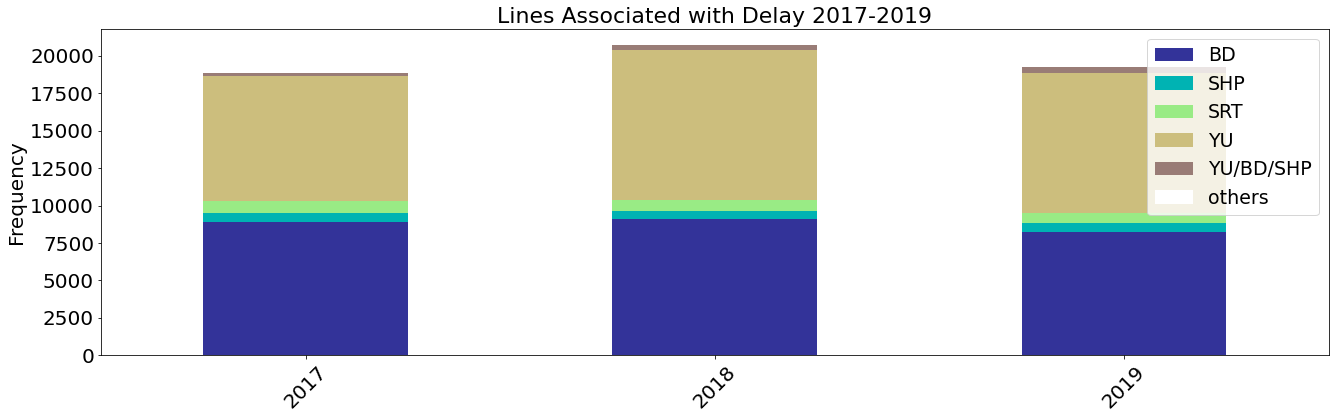

In [65]:
line_yr_val= ttc.groupby('Line')['Year'].value_counts().sort_values(ascending=False).unstack(0)
line_yr_val.plot.bar(figsize=(22, 6), fontsize=20, rot=45, cmap= 'terrain',
        stacked=True)
plt.xlabel(None)
plt.ylabel('Frequency', size=20)
plt.title('Lines Associated with Delay 2017-2019', size=22)
plt.legend(fontsize = 19);

In [66]:
# Findings:
#  Year - Line -  delays occur predominantly along the two major lines of
#                 Yonge-University and Blood-Danforth, consistently over
#                 the three years

####  C.2. a. iv.  Frequency of Delay: BIVARIATE: YEAR - STATION

In [67]:
yr_stn_val = ttc.groupby('Year')['Station'].value_counts().sort_values(ascending=False)
yr_stn_ct = ttc.groupby('Year')['Station'].count()
yr_stn_grpperc = ((yr_stn_val / yr_stn_ct)*100).round(2)
yr_stn_overall = ( (yr_stn_val/ 58844)*100).round(2)
yr_stn = pd.concat( [yr_stn_val, yr_stn_grpperc, yr_stn_overall], keys = ['Frequency','% for the Year','% over 3 Years'], axis =1)
yr_stn.head(10)

Frequency  % for the Year  % over 3 Years
Year Station                                                         
2018 KENNEDY BD STATION           985            4.75            1.67
2017 KENNEDY BD STATION           897            4.75            1.52
2018 KIPLING STATION              894            4.31            1.52
2019 FINCH STATION                879            4.57            1.49
     KIPLING STATION              867            4.51            1.47
2017 KIPLING STATION              846            4.48            1.44
2019 KENNEDY BD STATION           815            4.24            1.39
2018 FINCH STATION                715            3.45            1.22
     SHEPPARD WEST STATION        674            3.25            1.15
     WILSON STATION               642            3.10            1.09

In [68]:
# Findings:
#  Year - Station  - delays consistently more predominant on terminal
#                    stations Kennedy, Kipling and Finch

#### C.2.b.i.  Frequency of Delay: BIVARIATE:  MONTH - DAY

In [69]:
mo_day_val = ttc.groupby('Month')['Day'].value_counts().sort_values(ascending=False)
mo_day_ct = ttc.groupby('Month')['Day'].count()
mo_day_grpperc = ((mo_day_val / mo_day_ct)*100).round(2)
mo_day_overall = ( (mo_day_val/ 58844)*100).round(2)
mo_day = pd.concat( [mo_day_val, mo_day_grpperc, mo_day_overall], keys = ['Frequency','% for the Month','% over 3 Years'], axis =1)
mo_day.head(10)

Frequency  % for the Month  % over 3 Years
Month Day                                                  
6     Friday           949            19.11            1.61
1     Tuesday          946            17.96            1.61
      Wednesday        942            17.89            1.60
10    Tuesday          925            18.86            1.57
8     Thursday         924            17.95            1.57
7     Monday           916            18.04            1.56
11    Thursday         876            17.93            1.49
5     Wednesday        874            17.14            1.49
      Thursday         866            16.98            1.47
1     Monday           865            16.43            1.47

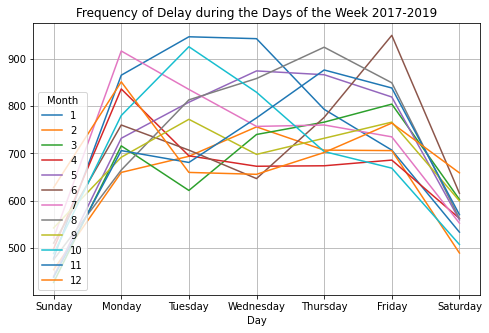

In [70]:
day_seq2 = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
day_mo_val = ttc.groupby('Day')['Month'].value_counts().unstack()
day_mo_val.reindex(day_seq2).plot(kind='line', figsize=(8, 5), subplots=False,
    legend=True,
    grid=True, title='Frequency of Delay during the Days of the Week 2017-2019')
plt.legend(loc = 'lower left', title = 'Month');

In [71]:
# Findings
#  Month - Day -  the highest numbers of delay occur on weekdays throughout
#                 the months

#### C.2.b.ii.  Frequency of Delay: BIVARIATE:  MONTH - TYPE

In [72]:
mo_type_val = ttc.groupby('Month')['Type'].value_counts().sort_values(ascending=False)
mo_type_ct = ttc.groupby('Month')['Type'].count()
mo_type_grpperc = ((mo_type_val / mo_type_ct)*100).round(2)
mo_type_overall = ( (mo_type_val/ 58844)*100).round(2)
mo_type = pd.concat( [mo_type_val, mo_type_grpperc, mo_type_overall], keys = ['Frequency','% for the Month','% over 3 Years'], axis =1)
mo_type.head(12)

,,Frequency,% for the Month,% over 3 Years
Month,Type,,,
11,Passenger,2119,43.37,3.60
8,Passenger,2080,40.40,3.53
6,Passenger,2076,41.80,3.53
7,Passenger,2056,40.49,3.49
12,Passenger,2042,41.50,3.47
5,Passenger,2037,39.94,3.46
10,Passenger,2028,41.35,3.45
9,Passenger,1926,40.10,3.27
1,Passenger,1906,36.19,3.24


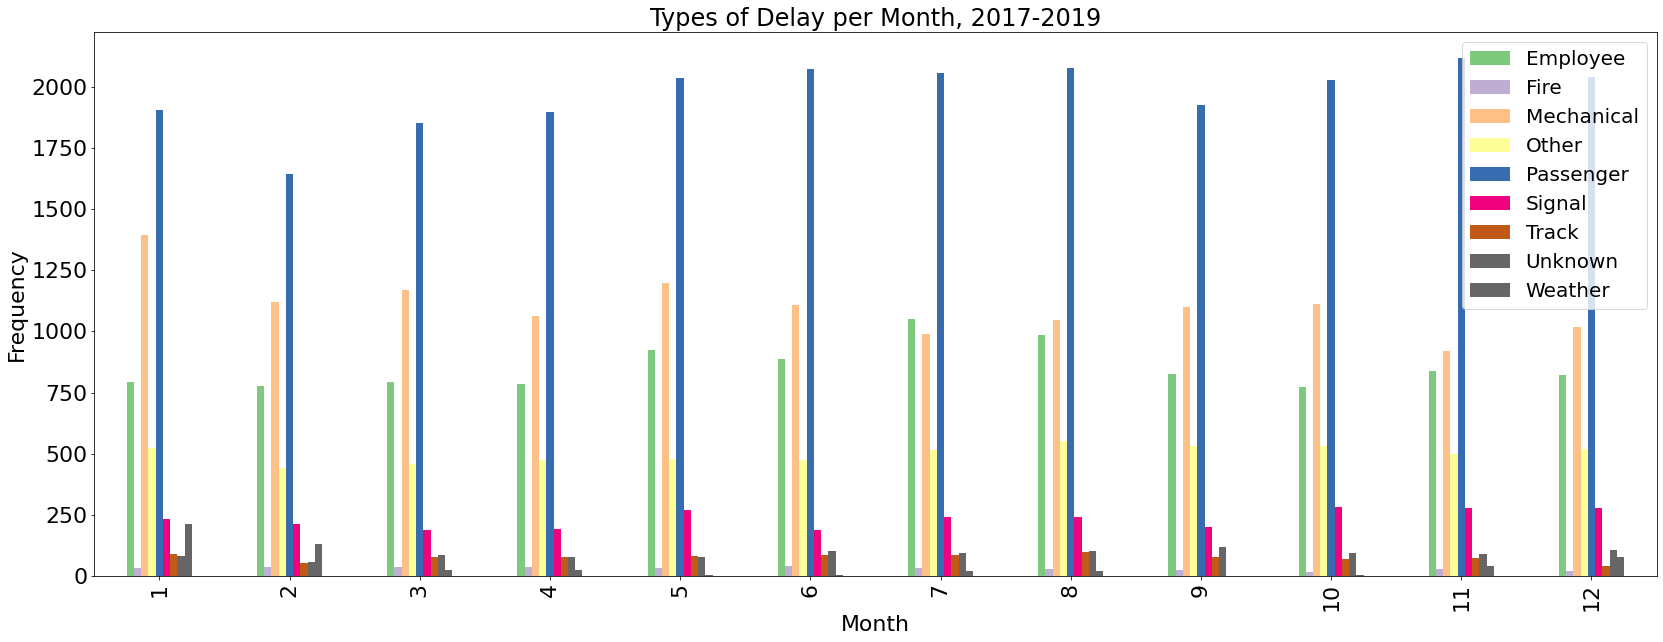

In [73]:
type_mo_val = ttc.groupby('Type')['Month'].value_counts().sort_values(ascending=True)
type_mo_val.unstack(0).plot.bar(figsize=(28, 10), fontsize =22, cmap = 'Accent')
plt.xlabel('Month', size=22)
plt.ylabel('Frequency',size=22)
plt.title('Types of Delay per Month, 2017-2019', fontsize=24)
plt.legend(loc = 'best', fontsize =20);

In [74]:
# Findings:
#  Month - Type -  passenger-associated delays are consistently the
#                  top causes of delay throughout the year

#### C.2.c.i.  Frequency of Delay: BIVARIATE:  DAY - HOUR

In [75]:
day_hr_val = ttc.groupby('Day')['Hour'].value_counts().sort_values(ascending=False)
day_hr_ct = ttc.groupby('Day')['Hour'].count()
day_hr_grpperc = ((day_hr_val / day_hr_ct)*100).round(2)
day_hr_overall = ( (day_hr_val/ 58844)*100).round(2)
day_hr = pd.concat( [day_hr_val, day_hr_grpperc, day_hr_overall], keys = ['Frequency','% for the Day','% over 3 Years'], axis =1)
day_hr.head(7)

,,Frequency,% for the Day,% over 3 Years
Day,Hour,,,
Tuesday,8,728,7.95,1.24
Monday,8,712,7.76,1.21
Wednesday,8,707,7.68,1.20
Thursday,17,648,6.98,1.10
Sunday,8,629,10.64,1.07
Friday,17,621,6.68,1.06
Tuesday,17,614,6.70,1.04


In [76]:
# Findings:
#  Day - Hour -  most delays occur on weekdays during the peak hours of 
#                8am and 5pm
#             -  remarkably, Sunday 8am showed a seemingly significant 
#                percentage of delay (subways start at 8am on Sundays)

#### C.2.c.ii.  Frequency of Delay: BIVARIATE:  DAY - TYPE

In [77]:
day_type_val = ttc.groupby('Day')['Type'].value_counts().sort_values(ascending=False)
day_type_ct = ttc.groupby('Day')['Type'].count()
day_type_grpperc = ((day_type_val / day_type_ct)*100).round(2)
day_type_overall = ( (day_type_val/ 58844)*100).round(2)
day_type = pd.concat( [day_type_val, day_type_grpperc, day_type_overall], keys = ['Frequency','% for the Day','% over 3 Years'], axis =1)
day_type.head(7)

,,Frequency,% for the Day,% over 3 Years
Day,Type,,,
Friday,Passenger,3797,40.86,6.45
Thursday,Passenger,3761,40.53,6.39
Wednesday,Passenger,3709,40.29,6.30
Tuesday,Passenger,3620,39.53,6.15
Monday,Passenger,3521,38.36,5.98
Saturday,Passenger,2906,42.61,4.94
Sunday,Passenger,2354,39.83,4.00


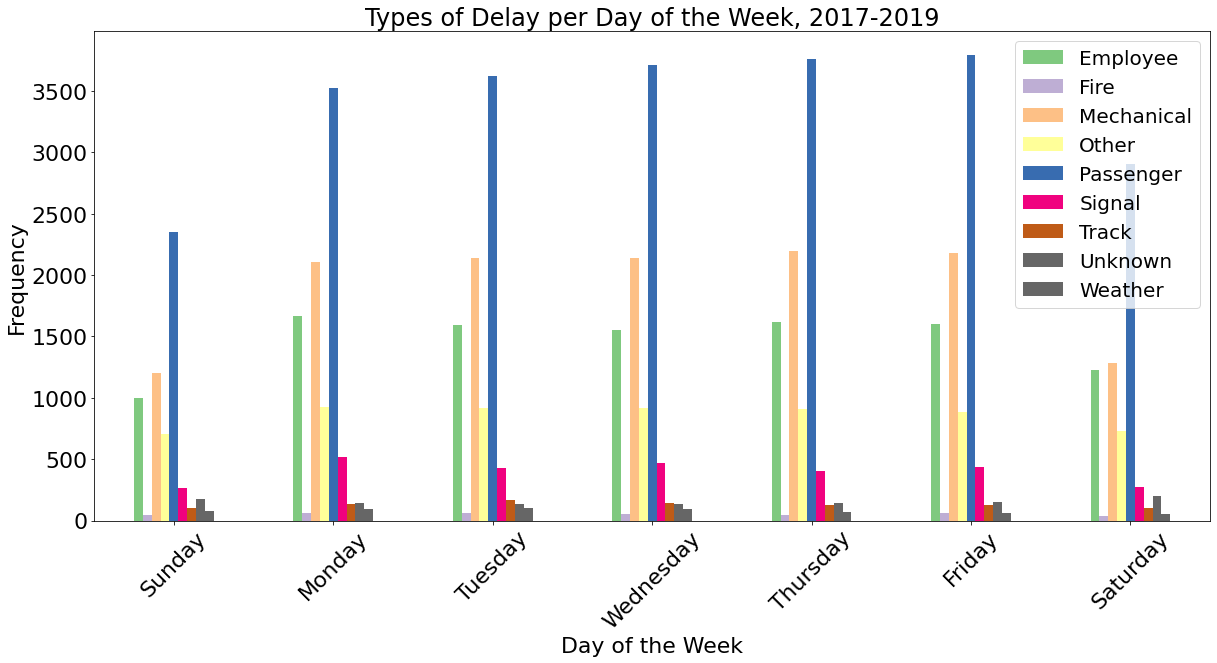

In [78]:
day_seq2 = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
type_day_val = ttc.groupby('Day')['Type'].value_counts().unstack()
type_day_val.reindex(day_seq2).plot.bar(figsize=(20, 9), fontsize =22, cmap = 'Accent', rot=45)
plt.xlabel('Day of the Week', size=22)
plt.ylabel('Frequency',size=22)
plt.title('Types of Delay per Day of the Week, 2017-2019', fontsize=24)
plt.legend(loc = 'best', fontsize =20);

In [79]:
# Findings:
#  Day - Type -  Passenger-associated delays lead the causes consistently
#                throughout the week

#### C.2.d.i  Frequency of Delay: BIVARIATE:  HOUR - TYPE

In [80]:
hr_type_val = ttc.groupby('Hour')['Type'].value_counts().sort_values(ascending=False)
hr_type_ct = ttc.groupby('Hour')['Type'].count()
hr_type_grpperc = ((hr_type_val / hr_type_ct)*100).round(2)
hr_type_overall = ( (hr_type_val/ 58844)*100).round(2)
hr_type = pd.concat( [hr_type_val, hr_type_grpperc, hr_type_overall], keys = ['Frequency','% for the Hour','% over 3 Years'], axis =1)
hr_type.head()

,,Frequency,% for the Hour,% over 3 Years
Hour,Type,,,
17,Passenger,1958,52.07,3.33
8,Passenger,1774,42.65,3.01
16,Passenger,1698,48.68,2.89
6,Mechanical,1667,49.10,2.83
18,Passenger,1583,49.21,2.69


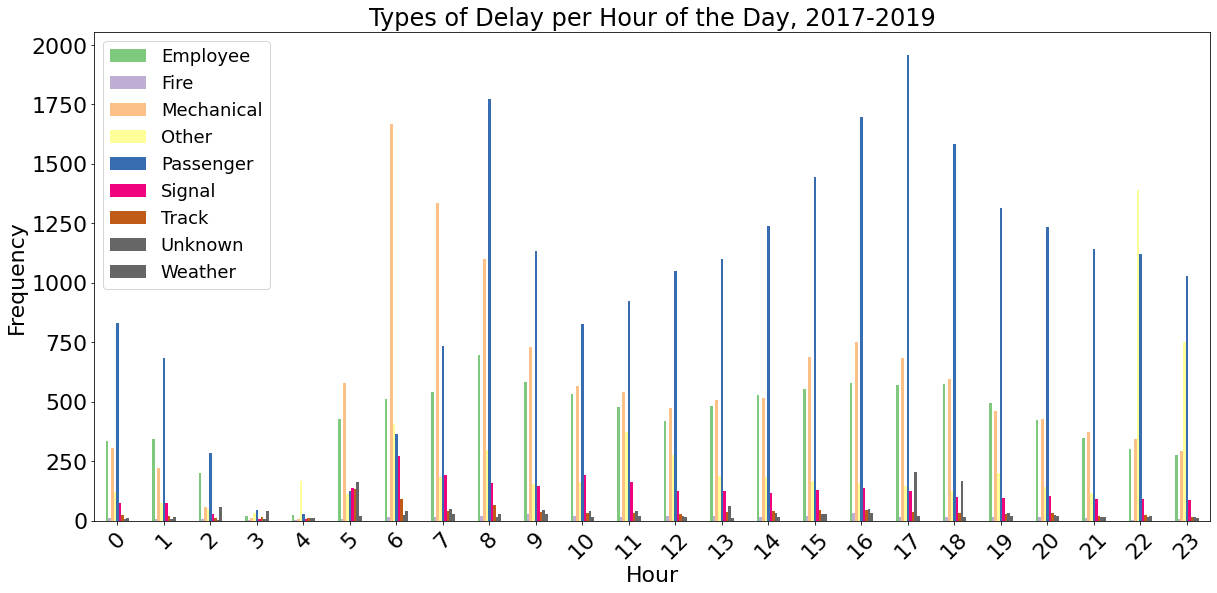

In [81]:
type_hr_val = ttc.groupby('Hour')['Type'].value_counts().unstack()
type_hr_val.plot.bar(figsize=(20, 9), fontsize =22, 
                     cmap = 'Accent', rot=45)
plt.xlabel('Hour', size=22)
plt.ylabel('Frequency',size=22)
plt.title('Types of Delay per Hour of the Day, 2017-2019', fontsize=24)
plt.legend(loc = 'best', fontsize =18);

In [82]:
# Findings:
#  Hour - Type -  Passenger-associated delays cause the majority of delays
#                 during the 24-hour period, especially during the 
#                 morning and afternoon rush hours
#              -  Mechanical-associated delays are now also detected, and
#                 occurd mostly during the early morning

#### C.2.e.i.  Frequency of Delay: BIVARIATE:  TYPE - CODE

In [83]:
type_code_val = ttc.groupby('Type')['Code'].value_counts().sort_values(ascending=False)
type_code_ct = ttc.groupby('Type')['Code'].count()
type_code_grpperc = ((type_code_val / type_code_ct)*100).round(2)
type_code_overall = ( (type_code_val/ 58844)*100).round(2)
type_code = pd.concat( [type_code_val, type_code_grpperc, type_code_overall], keys = ['Frequency','% for the Type','% over 3 Years'], axis =1)
type_code.head()

Frequency  % for the Type  % over 3 Years
Type       Code                                            
Mechanical MUSC        7617           57.50           12.94
Employee   TUSC        5004           48.80            8.50
Passenger  MUIS        4844           20.47            8.23
           MUPAA       4241           17.92            7.21
           SUDP        2984           12.61            5.07

In [84]:
# MUSC - miscellaneous speed control
# TUSC - operator overspeeding
# MUIS - injured or ill customer in station, transported
# MUPAA - passenger assistance alarm activated - no trouble found
# SUDP - disorderly patron

In [85]:
# Findings:
#  Type - Code -  majority of delays are associated with speed control
#                 from the types Mechanical and Employee
#              -  most of the passenger related delays are caused by 
#                 medical emergencies, false alarms and disorderly conduct

#### C.2.f.  Frequency of Delay: BIVARIATE:  STATION - CODE

In [86]:
stn_type_val = ttc.groupby('Station')['Type'].value_counts().sort_values(ascending=False)
stn_type_ct = ttc.groupby('Station')['Type'].count()
stn_type_grpperc = ((stn_type_val / stn_type_ct)*100).round(2)
stn_type_overall = ( (stn_type_val/ 58844)*100).round(2)
stn_type = pd.concat( [stn_type_val, stn_type_grpperc, stn_type_overall], keys = ['Frequency','% for the Station','% over 3 Years'], axis =1)
stn_type.head()

,,Frequency,% for the Station,% over 3 Years
Station,Type,,,
KIPLING STATION,Mechanical,1237,47.45,2.10
BLOOR STATION,Passenger,1098,75.88,1.87
KENNEDY BD STATION,Mechanical,1021,37.86,1.74
YUS/BD/SHEPPARD SUBWAY,Other,973,98.68,1.65
BLOOR DANFORTH SUBWAY,Other,862,92.89,1.46


In [87]:
# Findings:
# Station - Code -  the most common delays are of mechanical type occuring
#                   at the Kipling station

In [88]:
#  Summary of BIVARIATE Analyses Findings for FREQUENCY of Delays:

#  Year - Month - there does not appear to be a pattern for delay
#                 occurence among the months through the three years
#  Year - Type  - Passenger-associated delays are consistently predominant
#                 over the three years, followed by Mechanical causes
#  Year - Line -  delays occur predominantly along the two major lines of
#                 Yonge-University and Blood-Danforth, consistently over
#                 the three years
#  Year - Station  - delays consistently more predominant on terminal
#                    stations Kennedy, Kipling and Finch

#  Month - Day -  the highest numbers of delay occur on weekdays throughout
#                 the months
#  Month - Type -  Passenger-associated delays are consistently the
#                  top causes of delay throughout the year

#  Day - Hour -  most delays occur on weekday during the peak hours of 
#                8am and 5pm
#             -  remarkably, Sunday 8am showed a seemingly significant 
#                percentage of delay (subways start at 8am on Sundays)
#  Day - Type -  Passenger-associated delays lead the causes consistently
#                throughout the week

#  Hour - Type -  Passenger-associated delays cause the majority of delays
#                 during the 24-hour period, especially during the 
#                 morning and afternoon rush hours
#              -  Mechanical-associated delays are now also detected, and
#                 occurs mostly during the early morning

#  Type - Code -  majority of delays are associated with speed control
#                 from the types Mechanical and Employee
#              -  most of the passenger related delays are caused by 
#                 medical emergencies, false alarms and disorderly conduct

# Station - Code -  the most common delays are of mechanical type occuring
#                   at the Kipling station

#### C.3. MULTIVARIATE ANALYSES for FREQUENCY of Delay
####    a. Day - Hour - Type

In [89]:
day_hr_type_val = ttc.groupby(['Day','Hour'])['Type'].value_counts().sort_values(ascending=False)
day_hr_type_val.head(10)

Day        Hour  Type      
Monday     8     Passenger     379
Wednesday  8     Passenger     360
Tuesday    8     Passenger     360
Wednesday  17    Passenger     338
Tuesday    17    Passenger     336
Thursday   17    Passenger     334
Friday     17    Passenger     327
Wednesday  6     Mechanical    315
Thursday   16    Passenger     314
Tuesday    6     Mechanical    305
Name: Type, dtype: int64

In [90]:
# MULTIVARIATE Findings:
# Day - Hour - Type -  majority of the delays occur on weekday rush hours
#                      and are Passenger-related causes

#### D.  DURATION of Delays
####    a.  UNIVARIATE Analyses
####         a.  Min Delay

In [91]:
ttc['Min Delay'].agg(['mean','median', stat.mode,'min','max'])

mean        2.227908
median      0.000000
mode        0.000000
min         0.000000
max       515.000000
Name: Min Delay, dtype: float64

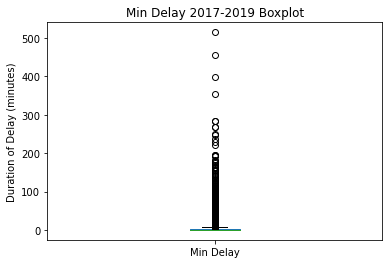

In [92]:
ttc['Min Delay'].plot(kind='box')
plt.ylabel('Duration of Delay (minutes)')
plt.title('Min Delay 2017-2019 Boxplot');

In [93]:
ttc_min_val = ttc['Min Delay'].value_counts()
ttc_min_ct = ttc['Min Delay'].count()
ttc_min_perc = ( (ttc_min_val / ttc_min_ct) * 100).round(2)
ttc_min = pd.concat([ttc_min_val, ttc_min_perc], keys = ['Frequency', '%'], axis=1)
ttc_min.head()

,Frequency,%
0,39428,67.00
3,6605,11.22
4,3606,6.13
5,3170,5.39
6,1381,2.35


In [94]:
ttc_min5_val = (ttc['Min Delay'] <=5).value_counts()
ttc_min5_ct = (ttc['Min Delay'] <=5).count()
ttc_min5_perc =((ttc_min5_val / ttc_min5_ct)*100).round(2)
ttc_min5 = pd.concat( [ttc_min5_val, ttc_min5_perc], keys = ['Frequency','%'], axis=1)
ttc_min5

,Frequency,%
True,52841,89.8
False,6003,10.2


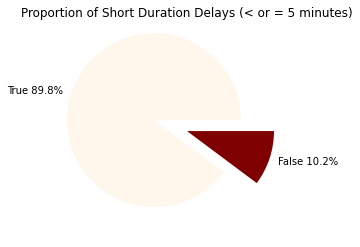

In [95]:
ttc_min5_val.plot(kind='pie', colormap = 'OrRd', explode = (0.4,0), labels = ['True 89.8%', 'False 10.2%'])
plt.ylabel(None)
plt.title('Proportion of Short Duration Delays (< or = 5 minutes)');

In [96]:
ttc_min120_val = (ttc['Min Delay'] >=120).value_counts().sort_index(ascending=False)
ttc_min120_ct = (ttc['Min Delay'] >=120).count()
ttc_min120_perc =((ttc_min120_val / ttc_min120_ct)*100).round(2)
ttc_min120 = pd.concat( [ttc_min120_val, ttc_min120_perc], keys = ['Frequency','%'], axis=1)
ttc_min120

,Frequency,%
True,47,0.08
False,58797,99.92


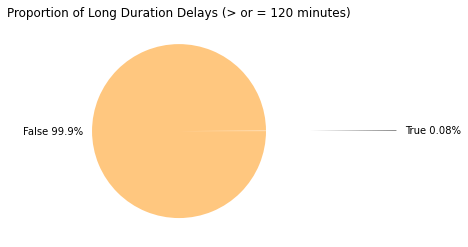

In [97]:
ttc_min120_val.plot(kind='pie', colormap = 'copper', explode = (1.5,0), 
                    labels = ['True 0.08%', 'False 99.9%'])
plt.ylabel(None)
plt.title('Proportion of Long Duration Delays (> or = 120 minutes)');

In [98]:
# Findings:
# Min Delay -  majority (67%) of Min delays had the value of '0'
#           -  almost 90% of the delays were of short duration,
#              lasting for <= 5 minutes
#           -  there was only a very small percentage (0.08%) of
#              long delays of >= 2 hours

#### D.1. Duration of Delay: UNIVARIATE Analysis : 
####        b.  Delay_Group

In [99]:
del_grp_val = ttc['Delay_Group'].value_counts().sort_index()
del_grp_perc = ( (del_grp_val / 58844) * 100).round(2)
del_grp = pd.concat([del_grp_val, del_grp_perc], keys = ['Frequency', '%'], axis=1)
del_grp

,Frequency,%
0,39428,67.00
1- 5,10243,17.41
5-9,6635,11.28
10-14,1350,2.29
15-19,550,0.93
20-24,192,0.33
25-29,94,0.16
30-44,164,0.28
45-59,50,0.08
60-119,91,0.15


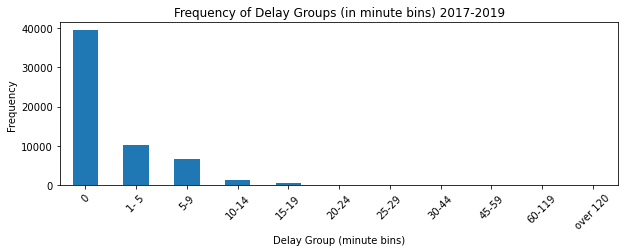

In [100]:
del_grp_val.plot(kind = 'bar', rot =45, figsize= (10,3))
plt.xlabel('Delay Group (minute bins)')
plt.ylabel('Frequency')
plt.title('Frequency of Delay Groups (in minute bins) 2017-2019');

In [101]:
# Findings:
# Delay_group -  majority of the delays were labelled '0'
#             -  most of the delays lasted for less than 10 minutes
#             -  a very small number lasted for more than 2 hours

In [102]:
# Summary of Findings for UNIVARIATE ANALYSIS for DURATION of Delay

# Min Delay -  majority (67%) of Min delays had the value of '0'
#           -  almost 90% of the delays were of short duration,
#              lasting for <= 5 minutes
#           -  there was only a very small percentage (0.08%) of
#              long delays of >= 2 hours

# Delay_Group - same as Min Delay

#### D.2.  Duration of Delay:  BIVARIATE Analyses:
####    a.i.  Min Delay - Year

In [103]:
ttc_min_Y = ttc.resample('Y')
ttc_min_Y['Min Delay'].agg(['count','sum', 'mean', 'median', stat.mode, 'min','max'])

,count,sum,mean,median,mode,min,max
DateTime,,,,,,,
2017-12-31,18885,36580,1.936987,0,0,0,355
2018-12-31,20737,48278,2.328109,0,0,0,515
2019-12-31,19222,46241,2.405629,0,0,0,455


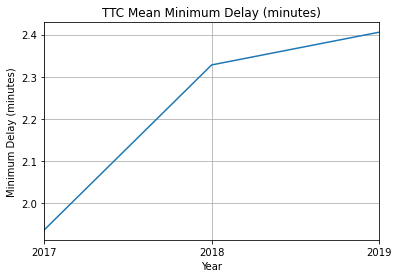

In [104]:
ttc_min_Y_plot = ttc_min_Y['Min Delay'].mean().plot(kind= 'line', 
                    grid = True,
                    title = 'TTC Mean Minimum Delay (minutes)')
ttc_min_Y_plot.set_xlabel('Year')
ttc_min_Y_plot.set_ylabel('Minimum Delay (minutes)')
ttc_min_Y_plot;

In [105]:
# Findings:
#   Min Delay - Year -  the mean duration of delay has been increasing
#                       from 2017 to 2019
#                    -  while the overall frequency of delays seem stable
#                       the duration is getting longer over the 3-year period

#### D.2.  DURATION of Delay: BIVARIATE Analyses: 
####       a.ii.  Min Delay - Month

In [106]:
ttc_min_M = ttc.resample('M')
ttc_min_M['Min Delay'].agg(['count','sum', 'mean', 'median', stat.mode, 'min','max'])

,count,sum,mean,median,mode,min,max
DateTime,,,,,,,
2017-01-31,1522,2556,1.679369,0,0,0,113
2017-02-28,1400,2779,1.985000,0,0,0,193
2017-03-31,1555,2528,1.625723,0,0,0,76
2017-04-30,1479,2852,1.928330,0,0,0,91
2017-05-31,1634,3601,2.203794,0,0,0,267
2017-06-30,1568,3336,2.127551,0,0,0,355
2017-07-31,1497,2577,1.721443,0,0,0,135
2017-08-31,1581,2726,1.724225,0,0,0,102
2017-09-30,1478,2826,1.912043,0,0,0,94


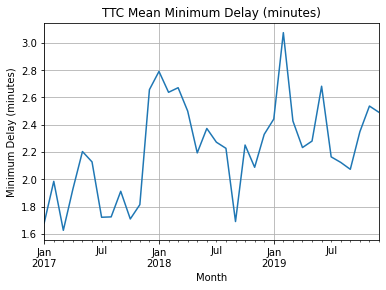

In [107]:
ttc_min_M_plot = ttc_min_M['Min Delay'].mean().plot(kind= 'line', 
                    grid = True,
                    title = 'TTC Mean Minimum Delay (minutes)')
ttc_min_M_plot.set_xlabel('Month')
ttc_min_M_plot.set_ylabel('Minimum Delay (minutes)')
ttc_min_M_plot;

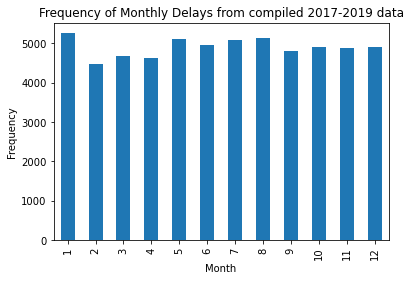

In [108]:
# duplicate, for comparison above
ttc['Month'].value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Monthly Delays from compiled 2017-2019 data');

In [109]:
# Findings:
#  Min Delay - Month -  there is a general trend of increasing duration
#                       of delay from 2017 to 2019
#                    -  the figure is suggestive of seasonality whereby
#                       delays occuring during the summer months are of
#                       shorter duration, and gets longer during the winter
#                    -  when examined alongside the compiled frequency
#                       graph, it may be cautiously inferred that
#                       delays are more frequent and of longer duration 
#                       during the winter, and while the frequency is 
#                       not affected, the duration of delays are shorter
#                       during summer

#### D.2.  DURATION of Delay:  BIVARIATE Analyses: 
####         a.iii.  Min Delay -  Day

In [110]:
ttc_min_D = ttc.resample('D')
ttc_min_D['Min Delay'].agg(['count','sum', 'mean', 'median', stat.mode, 'min','max'])

,count,sum,mean,median,mode,min,max
DateTime,,,,,,,
2017-01-01,30,120,4.000000,0.0,0,0,33
2017-01-02,36,39,1.083333,0.0,0,0,18
2017-01-03,50,70,1.400000,0.0,0,0,13
2017-01-04,51,65,1.274510,0.0,0,0,10
2017-01-05,42,112,2.666667,0.0,0,0,30
...,...,...,...,...,...,...,...
2019-12-27,46,245,5.326087,0.0,0,0,162
2019-12-28,38,49,1.289474,0.0,0,0,8
2019-12-29,38,75,1.973684,0.0,0,0,12


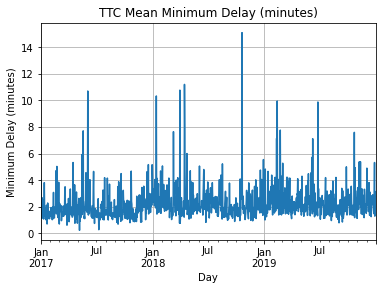

In [111]:
ttc_min_D_plot = ttc_min_D['Min Delay'].mean().plot(kind= 'line', 
                    grid = True,
                    title = 'TTC Mean Minimum Delay (minutes)')
ttc_min_D_plot.set_xlabel('Day')
ttc_min_D_plot.set_ylabel('Minimum Delay (minutes)')
ttc_min_D_plot;

In [112]:
# Findings:
#  Min Delay - Day(resampled)  - no pattern appreciated for duration of delay

#### D.2. DURATION of Delay:  BIVARIATE Analyses: 
####          b.i. Delay_Group - Year

In [113]:
delgrp_yr_val = ttc.groupby('Delay_Group')['Year'].value_counts().sort_values(ascending=False)
delgrp_yr_ct = ttc.groupby('Delay_Group')['Year'].count()
delgrp_yr_grpperc = ((delgrp_yr_val / delgrp_yr_ct)*100).round(2)
delgrp_yr_overall = ( (delgrp_yr_val/ 58844)*100).round(2)
delgrp_yr = pd.concat( [delgrp_yr_val, delgrp_yr_grpperc, delgrp_yr_overall], keys = ['Frequency','% for the Group','% over 3 Years'], axis =1)
delgrp_yr.head(10)

Frequency  % for the Group  % over 3 Years
Delay_Group Year                                            
0           2018      13569            34.41           23.06
            2017      13432            34.07           22.83
            2019      12427            31.52           21.12
1- 5        2018       3806            37.16            6.47
            2019       3558            34.74            6.05
            2017       2879            28.11            4.89
5-9         2018       2439            36.76            4.14
            2019       2358            35.54            4.01
            2017       1838            27.70            3.12
10-14       2018        498            36.89            0.85

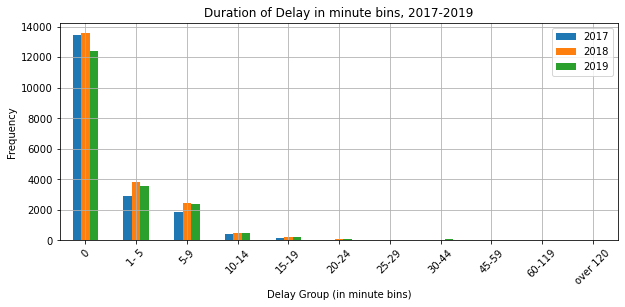

In [114]:
delgrp_yr_val.unstack().plot(kind='bar', figsize=(10, 4), subplots=False,
    grid=True, rot = 45,
    title='Duration of Delay in minute bins, 2017-2019')
plt.legend(loc = 'best')
plt.xlabel('Delay Group (in minute bins)')
plt.ylabel('Frequency');

In [115]:
# Findings:
# Delay_Group - Year -  there seems to be a small creeping increase in the
#                       duration of delay over the 3-year period

In [116]:
# Summary of Findings for BIVARIATE Analyses for DURATION of Delay:

#   Min Delay - Year -  the mean duration of delay has been increasing
#                       from 2017 to 2019
#                    -  while the overall frequency of delays seem stable
#                       the duration is getting longer over the 3-year period
#   Min Delay - Month - there is a general trend of increasing duration
#                       of delay from 2017 to 2019
#                    -  the figure is suggestive of seasonality whereby
#                       delays occuring during the summer months are of
#                       shorter duration, and gets longer during the winter
#                    -  when examined alongside the compiled frequency
#                       graph, it may be cautiously inferred that
#                       delays are more frequent and of longer duration 
#                       during the winter, and while the frequency is 
#                       not affected, the duration of delays are shorter
#                       during summer
#  Min Delay - Day(resampled)  - no pattern appreciated for duration of delay

#  Delay_Group - Year - there seems to be a small creeping increase in the
#                       duration of delay over the 3-year period

#### D.3.  Duration of Delay:  MULTIVARIATE Analyses:
####        a.i.  Min Delay - Year - Type

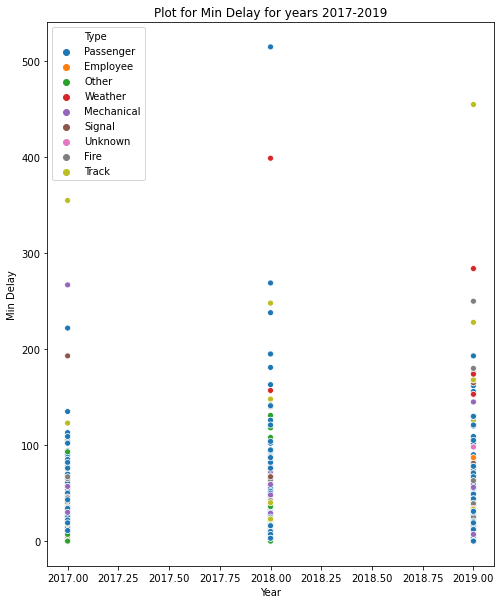

In [117]:
plt.figure(figsize = (8,10))
sns.scatterplot(ttc['Year'], ttc['Min Delay'], hue = ttc['Type'])
plt.title('Plot for Min Delay for years 2017-2019');

In [118]:
# Findings: 
#  Min Delay - Year - Type
#        -  Majority of Delays are in the 0-100 minute range
#        -  The outliers causes are varied, including passenger, weather 
#               and track-related causes

#### D.3. DURATION of Delay:  MULTIVARIATE Analyses:
####         a.ii.  Min Delay - Month - Type

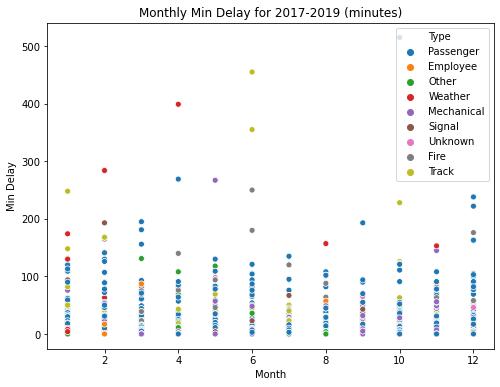

In [119]:
plt.figure(figsize = (8,6))
sns.scatterplot(ttc['Month'], ttc['Min Delay'], hue = ttc['Type'])
plt.title('Monthly Min Delay for 2017-2019 (minutes)');

In [120]:
# Findings:
#    Min Delay - Month - Type
#       -  The causes of the outliers are varied, with representations
#          from track-, weather-, and passenger-related causes

#### D.3. DURATION of Delay:  MULTIVARIATE Analyses
####      a.iii.  Min Delay - Day - Type

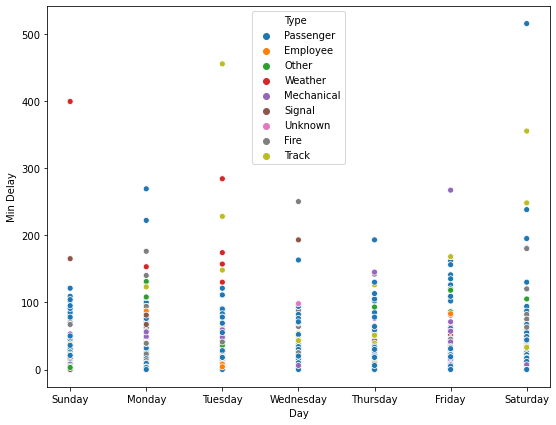

In [121]:
plt.figure(figsize = (9,7))
sns.scatterplot(ttc['Day'], ttc['Min Delay'], hue = ttc['Type']);

In [122]:
# Findings:
#  Min Delay - Day - Type
#      -  While a previous graph showed that the frequency of delays
#         are less during the weekends, this plot shows that the duration
#         of delays on the weekends are as long, or even longer, compared
#         to that of weekdays

#### D.3.  DURATION of Delay:  MULTIVARIATE Analyses:
####        a.iv.  Min Delay - Hour - Type

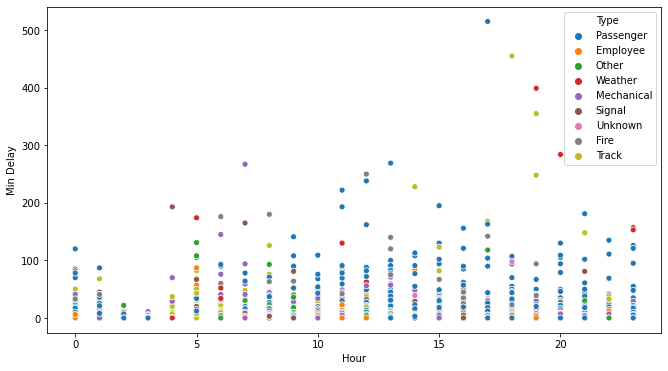

In [123]:
plt.figure(figsize = (11,6))
sns.scatterplot(ttc['Hour'], ttc['Min Delay'], hue = ttc['Type']);

In [124]:
# Findings:
#  Min Delay - Hour - Type
#     - the frequency of delays seem to be mirrored by the duration
#       when analyzed by the hour: there is an increase during the 
#       rush hours and a decrease during the dead of the night
#    -  there is an unusual collection of long delays during the early 
#       evening with causes including passenger-, weather- and track-related

#### D.3.  DURATION of Delay:  MULTIVARIATE Analyses:
####        a.v.  Min Delay - (Year, Month, Day) - Line

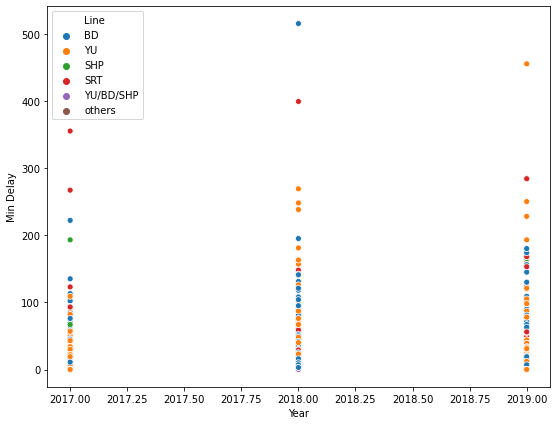

In [125]:
plt.figure(figsize = (9,7))
sns.scatterplot(ttc['Year'], ttc['Min Delay'], hue = ttc['Line']);

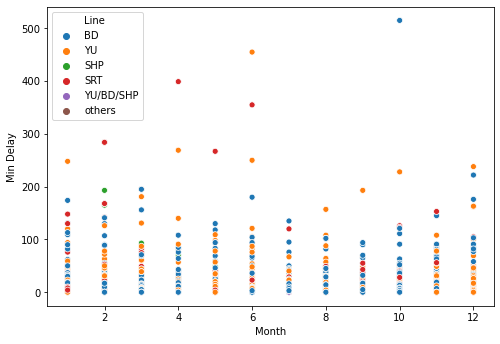

In [126]:
plt.figure(figsize = (8,5.5))
sns.scatterplot(ttc['Month'], ttc['Min Delay'], hue = ttc['Line']);

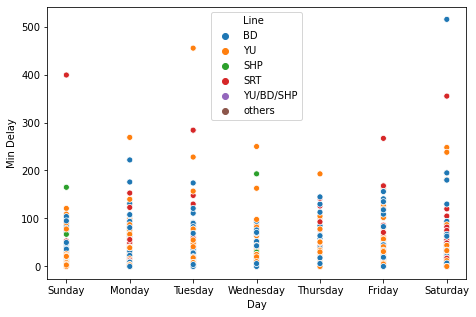

In [127]:
plt.figure(figsize = (7.5, 5))
sns.scatterplot(ttc['Day'], ttc['Min Delay'], hue = ttc['Line']);

In [128]:
# Findings:
#  Min Delay - (Year, Month, Day) - Line
#     - the delays are predominantly from the main lines of Yonge-University
#       and Blood-Danforth, however, it is noteworth that the Scarborough RT
#       has a significant presence among the long delays

#### D.3. DURATION of Delay:  MULTIVARIATE Analyses: 
####       b.i. Delay_Group > 0 - Type (Passenger) - Code

In [129]:
delay_above0_passenger = ttc [ (ttc['Delay_Group'] != '0') & 
                          (ttc['Type'] == 'Passenger') ]
delay_above0_passenger['Code'].value_counts().head()
# SUDP - disorderly patron
# MUIR - ill or injured customer on train, medical aid refused
# MUI - ill or injured customer on train, transported

SUDP     1768
MUIR     1405
MUI      1025
MUPAA     984
MUDD      566
Name: Code, dtype: int64

In [130]:
# Findings:
#  Among delays lasting for at least 1 minute and which are passenger-caused,
#      the leading causes are disorderly conduct and medical emergencies

#### D.3.  DURATION of Delay: MULTIVARIATE Analyses:
####       b.ii.  Delay_Group >120 - Type (Passenger) - Code

In [131]:
delay120_passenger = ttc [ (ttc['Delay_Group'] == 'over 120') & 
                          (ttc['Type'] == 'Passenger') ]
delay120_passenger['Code'].value_counts()
# MUPRI - train in contact with person
# SUPOL - held by police
# SUSP - suspicious package

MUPR1    12
SUSP      2
SUPOL     2
SUAP      1
SUO       1
SUBT      1
Name: Code, dtype: int64

In [132]:
# Findings:
#  Among long delays lasting for more than 2 hours, the majority were
#    caused by trains going in contact with people.  Other causes
#    include security reasons

#### D.3.  DURATION of Delay:  MULTIVARIATE Analyses:
####        b.iii.  Delay_Group >0 - Type (Mechanical) - Code

In [133]:
delay_above0_mech = ttc [ (ttc['Delay_Group'] != '0') & 
                          (ttc['Type'] == 'Mechanical') ]
delay_above0_mech['Code'].value_counts().head(3)
# EUDO - door problems - faulty equipment
# EUNT - equipment, no trouble found
# MUSC - miscellaneous speed control

EUDO    705
EUNT    376
MUSC    292
Name: Code, dtype: int64

In [134]:
# Findings:
#  Among delays lasting for at least 1 minute and having mechanical reasons,
#     the leading cause are faulty doors

#### D.3.  DURATION of Delay:  MULTIVARIATE Analyses:
####        b.iv. Delay_group >120 - Type (Mechanical) - Code

In [135]:
delay120_mech = ttc [ (ttc['Delay_Group'] == 'over 120') & 
                          (ttc['Type'] == 'Mechanical') ]
delay120_mech['Code'].value_counts()
# ERHV - high voltage
# PUTTP - traction power rail related

PUTTP    1
ERHV     1
Name: Code, dtype: int64

In [136]:
# Findings:
#  Among delays lasting for more than 2 hours and mechanical-related,
#     one was caused by a high voltage problem, and another was due to
#     a traction power rail problem

#### D.3.  DURATION of Delay:  MULTIVARIATE Analyses:
####        b.v.  Delay_Group >0, - Type (Employee) - Code

In [137]:
delay_above0_emp = ttc [ (ttc['Delay_Group'] != '0') & 
                          (ttc['Type'] == 'Employee') ]
delay_above0_emp['Code'].value_counts().head(3)
# TUNIP - operator not in position
# TUMVS - operator violated signal
# MUNOA - no operator immediately available

TUNIP    454
TUMVS    424
MUNOA    370
Name: Code, dtype: int64

In [138]:
delay_above0_emp = ttc [ (ttc['Delay_Group'] == 'over 120') & 
                          (ttc['Type'] == 'Employee') ]
delay_above0_emp['Code'].value_counts().head(3)

Series([], Name: Code, dtype: int64)

In [139]:
# Findings:
#  Among delays lasting for at least 1 minute and are employee-related,
#    the leading causes include the operator not being in postion or
#    violating a signal
#  There were no long delays attributed to Employee type

In [140]:
# Summary of Findings for MULTIVARIATE Analysis for DURATION of Delay

#  Min Delay - Year - Type
#        -  Majority of Delays are in the 0-100 range
#        -  The outliers causes are varied, including passenger, weather 
#               and track-related causes

#  Min Delay - Month - Type
#       -  The causes of the outliers are varied, with representations
#          from track-, weather-, and passenger-related causes

#  Min Delay - Day - Type
#      -  While a previous graph showed that the frequency of delays
#         are less during the weekends, this plot shows that the duration
#         of delays on the weekends are as long, or even longer, compared
#         to that of weekdays

#  Min Delay - Hour - Type
#     - the frequency of delays seem to be mirrored by the duration
#       when analyzed by the hour: there is an increase during the 
#       rush hours and a decrease during the dead of the night
#    -  there is an unusual collection of long delays during the early 
#       evening with causes including passenger-, weather- and track-related

#  Min Delay - (Year, Month, Day) - Line
#     - the delays are predominantly from the main lines of Yonge-University
#       and Blood-Danforth, however, it is noteworth that the Scarborough RT
#       has a significant presence among the long delays

#  Among delays lasting for at least 1 minute and which are passenger-caused,
#      the leading causes are disorderly conduct and medical emergencies

#  Among long delays lasting for more than 2 hours, the majority were
#    caused by trains going in contact with people.  Other causes
#    were for security reasons

#  Among delays lasting for at least 1 minute and having mechanical reasons,
#     the leading cause are faulty doors

#  Among delays lasting for more than 2 hours and mechanical-related,
#     one was caused by a high voltage problem, and another was due to
#     a traction power rail problem

#  Among delays lasting for at least 1 minute and are employee-related,
#    the leading causes include the operator not being in postion or
#    violating a signal
#  There were no long delays attributed to Employee type

#### E.  FORECASTING
####     1.a.  Autocorrelation:  Monthly Min Delay

In [141]:
ttc_min_M_mean = ttc_min_M['Min Delay'].mean()
ttc_min_M_mean.isnull().sum()

0

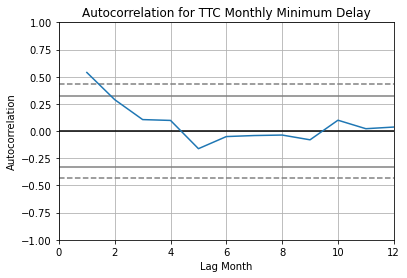

In [142]:
ttc_min_M_mean = ttc_min_M['Min Delay'].mean()
ttc_min_M_acorr = autocorrelation_plot(ttc_min_M_mean)
ttc_min_M_acorr.set_xlim(0,12)
ttc_min_M_acorr.set_xlabel('Lag Month')
ttc_min_M_acorr.set_title('Autocorrelation for TTC Monthly Minimum Delay')
ttc_min_M_acorr;

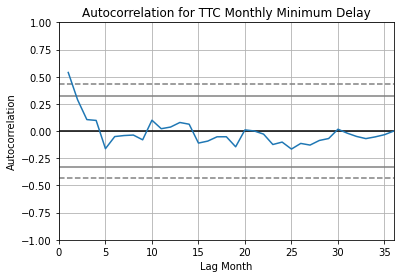

In [143]:
ttc_min_M_mean = ttc_min_M['Min Delay'].mean()
ttc_min_M_acorr = autocorrelation_plot(ttc_min_M_mean)
ttc_min_M_acorr.set_xlim(0,36)
ttc_min_M_acorr.set_xlabel('Lag Month')
ttc_min_M_acorr.set_title('Autocorrelation for TTC Monthly Minimum Delay')
ttc_min_M_acorr;

In [144]:
# Findings:
#  Monthly Min Delay - there is no correlation among delays

####      1. b.  Forecasting:  Autocorrelation:  Daily Min Delay  (Regular Day and Business Day)

In [145]:
ttc_min_D_mean = ttc_min_D['Min Delay'].mean()
ttc_min_D_mean.isnull().sum()

0

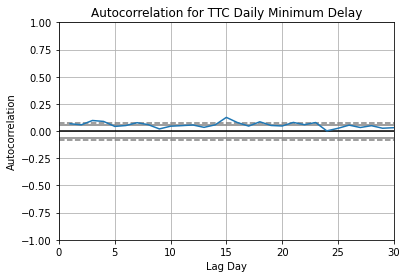

In [146]:
ttc_min_D_mean = ttc_min_D['Min Delay'].mean()
ttc_min_D_acorr = autocorrelation_plot(ttc_min_D_mean)
ttc_min_D_acorr.set_xlim(0, 30)
ttc_min_D_acorr.set_xlabel('Lag Day')
ttc_min_D_acorr.set_title('Autocorrelation for TTC Daily Minimum Delay')
ttc_min_D_acorr;

In [147]:
ttc_min_B = ttc.resample('B')

In [148]:
ttc_min_B_mean = ttc_min_B['Min Delay'].mean()
ttc_min_B_mean.isnull().sum()

0

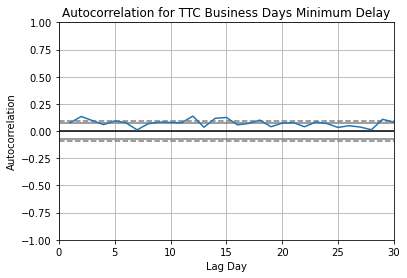

In [149]:
ttc_min_B_mean = ttc_min_B['Min Delay'].mean()
ttc_min_B_acorr = autocorrelation_plot(ttc_min_B_mean)
ttc_min_B_acorr.set_xlim(0, 30)
ttc_min_B_acorr.set_xlabel('Lag Day')
ttc_min_B_acorr.set_title('Autocorrelation for TTC Business Days Minimum Delay')
ttc_min_B_acorr;

In [150]:
# Findings:
#  Daily Min Delay - there is no autocorrelation for either the regular day or business day

####      1. c.  Forecasting:  Autocorrelation:  Hourly Min Delay

In [151]:
ttc_min_H = ttc.resample('H')
ttc_min_H['Min Delay'].agg(['count','sum', 'mean', 'median','min','max'])

,count,sum,mean,median,min,max
DateTime,,,,,,
2017-01-01 00:00:00,1,0,0.0,0.0,0.0,0.0
2017-01-01 01:00:00,1,0,0.0,0.0,0.0,0.0
2017-01-01 02:00:00,0,0,NaN,NaN,NaN,NaN
2017-01-01 03:00:00,1,4,4.0,4.0,4.0,4.0
2017-01-01 04:00:00,2,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2019-12-31 19:00:00,1,0,0.0,0.0,0.0,0.0
2019-12-31 20:00:00,1,4,4.0,4.0,4.0,4.0
2019-12-31 21:00:00,2,13,6.5,6.5,0.0,13.0


In [152]:
ttc_min_H_mean = ttc_min_H['Min Delay'].mean().ffill(limit=4).bfill(limit=4)
ttc_min_H_mean.isnull().sum()

0

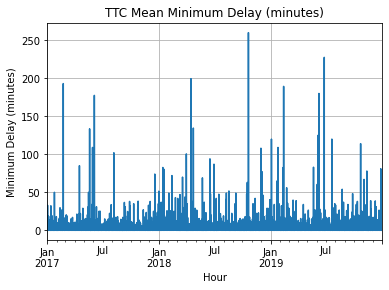

In [153]:
ttc_min_H_plot = ttc_min_H_mean.plot(kind= 'line', 
                    grid = True,
                    title = 'TTC Mean Minimum Delay (minutes)')
ttc_min_H_plot.set_xlabel('Hour')
ttc_min_H_plot.set_ylabel('Minimum Delay (minutes)')
ttc_min_H_plot;

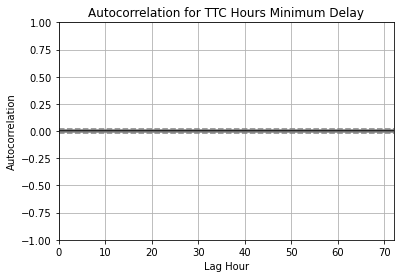

In [154]:
ttc_min_H_mean = ttc_min_H['Min Delay'].mean()
ttc_min_H_acorr = autocorrelation_plot(ttc_min_H_mean)
ttc_min_H_acorr.set_xlim(0, 72)
ttc_min_H_acorr.set_xlabel('Lag Hour')
ttc_min_H_acorr.set_title('Autocorrelation for TTC Hours Minimum Delay')
ttc_min_H_acorr;

In [155]:
# Findings:
#  Hourly Min Delay - no autocorrelation

####      1. d. Forecasting:  Autocorrelation:  Mechanical Type - Daily Min Delay

In [156]:
mech = ttc [ ttc['Type'] == 'Mechanical']

mech_min_D = mech.resample('D')

mech_min_D_mean = mech_min_D['Min Delay'].mean().ffill(limit=1)
mech_min_D_mean.isnull().sum()

0

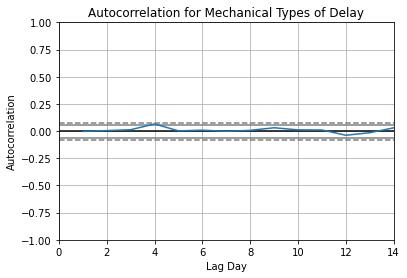

In [157]:
mech_min_D_acorr = autocorrelation_plot(mech_min_D_mean)
mech_min_D_acorr.set_xlim(0, 14)
mech_min_D_acorr.set_xlabel('Lag Day')
mech_min_D_acorr.set_title('Autocorrelation for Mechanical Types of Delay')
mech_min_D_acorr;

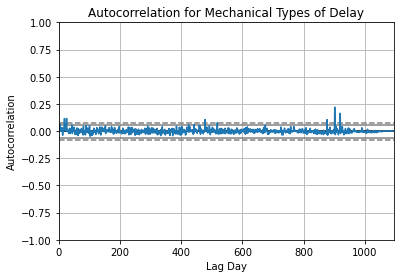

In [158]:
mech_min_D_acorr = autocorrelation_plot(mech_min_D_mean)
mech_min_D_acorr.set_xlim(0, 1095)
mech_min_D_acorr.set_xlabel('Lag Day')
mech_min_D_acorr.set_title('Autocorrelation for Mechanical Types of Delay')
mech_min_D_acorr;

In [163]:
#mech = ttc [ ttc['Type'] == 'Mechanical']

mech_min_M = mech.resample('M')

mech_min_M_mean = mech_min_M['Min Delay'].mean()
mech_min_M_mean.isnull().sum()

0

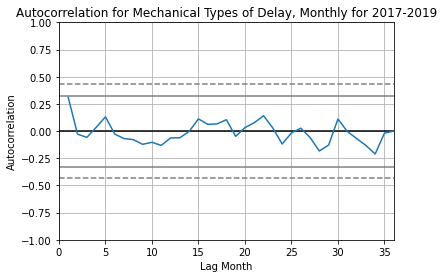

In [164]:
mech_min_M_acorr = autocorrelation_plot(mech_min_M_mean)
mech_min_M_acorr.set_xlim(0, 36)
mech_min_M_acorr.set_xlabel('Lag Month')
mech_min_M_acorr.set_title('Autocorrelation for Mechanical Types of Delay, Monthly for 2017-2019')
mech_min_M_acorr;

In [159]:
# Findings:
#  Daily Mechanical Type Min Delay - no autocorrelation

In [160]:
# Summary of Findings for AUTOCORRELATION:
#  Monthly Min Delay - there is no autocorrelation among delays
#  Daily Min Delay - no autocorrelation (both regular and business day)
#  Hourly Min Delay - no autocorrelation
#  Daily Mechanical Type Min Delay - no autocorrelation

#### E.2.  FORECASTING:  Linear Regression
####    a. Delay frequency and duration

model coefficient =  [78.07333614]
model intercept =  1461.0701082821074


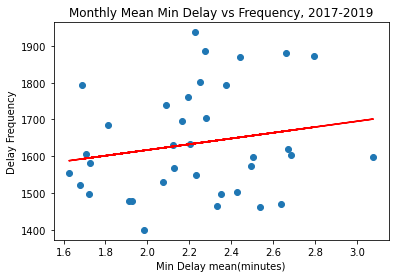

In [161]:
ttc_min_M_mean = ttc_min_M['Min Delay'].mean()
ttc_min_M_count = ttc_min_M['Min Delay'].count()

plt.scatter(ttc_min_M_mean, ttc_min_M_count)
plt.xlabel('Min Delay mean(minutes)')
plt.ylabel('Delay Frequency')
plt.title('Monthly Mean Min Delay vs Frequency, 2017-2019');

X = ttc_min_M_mean.values.reshape(-1,1)
Y = ttc_min_M_count

model = sklearn.linear_model.LinearRegression().fit(X,Y)
print('model coefficient = ', model.coef_)
print('model intercept = ', model.intercept_)

lin_pred = model.predict(X)

plt.plot(X, model.predict(X), 'r-');

In [162]:
# Findings:
#  There is a weak correlation between the frequency and the duration of
#     delays on the TTC trips from 2017 to 2019

#### F. SUMMARY of Findings:

**Type/ Code** 
- the most common type of delay is passenger-associated, followed by mechanical type
- most passenger-related delays are caused by medical emergencies, false alarms and disorderly conduct, and occur during weekday rush hours
- the mechanical-related delays are associated with speed control and occur mostly during the early morning.  
- the cause for prolonged delays are varied, including passenger- , weather- and track-related causes

**Line** 
- the line most associated with delays is the Yonge-University line, causing delays 47% of the time, followed closely by the Bloor-Danforth line at 44.5%
- the Scarborough RT line manifests with frequent prolonged duration of delays

**Station** 
- there is a trend of twice the number of delays on the terminal stations of Kennedy and Kipling (BD Line), and Finch (YU Line)

**Year** 
- the frequency of delays seem stable through the 3 years, however, the duration of delays have an increasing trend

**Month** 
- it may be cautiously inferred that more delays tended to happen during the summer and winter months, however, the duration during winter was in general longer, and the duration during summer was in general shorter

**Day** 
- there is an equivalent distribution of delays during the weekdays
- there are less delays during the weekends, however, the duration of delays are as long, or even longer, when compared to weekdays

**Hour**
- the delays are clustered around the rush hours of 6-9am (peaking at 8am), and 3-6pm (peaking at 5pm)
- there seems to be a significantly decreased number and duration of delays during the dead hours of the night, troughing at 3-4am
- In general, there were less delays during the weekend hours, except for Sunday 8am

**Min Delay** 
-  majority of delays had a value of '0' which should be interpreted with caution
- almost 90% of the delays were of short duration, lasting for <= 5 minutes
- only a very small percentage (0.08%) lasted for >= 2 hours
- the leading causes of short duration delays are:
    - for passenger-related causes: 
        * medical emergencies and disorderly conduct
    - for mechanical causes:
        * faulty doors
    - for employee causes:
        * operator not being in position or violating a signal
- the leading causes of delays >=2 hours are:
    - for passenger-related causes:
        * trains going in contact with people
- there is no significant autocorrelation of delays
- there is a weak correlation between frequency and duration of delay

####  Answers to Questions:

#### 1. How does the time of the day impact the number and duration of delays?
         Delays are clustered around the rush hours and peaks at 8am and 5pm.  There is a mild correlation between the number and duration of delays.

#### 2. Do certain types of delay occur more or less during specific hours of the day?
        Passenger-related delays occur more during rush hours.
        Mechanical-related delays occur more during the early morning.

#### 3. Are there relationship(s) between the day of the week and the number and duration of delays?
        Delays occur more frequently during the weekdays.
        There were less delays during the weekends, however, the duration of delay tends to be longer during weekends.

#### 4. Are there relationship(s) between the day of the week and the type of delays?
        Passenger-related delays led the causes of delay throughout the week.

#### 5. Are there relationship(s) between month and number and duration of delays?
         Delays tended to happen during summer and winter months. 
         The duration were shorter during the summer and longer during the winter, in general.

#### 6. Are there relationship(s) between month and type of delays?
         Passenger-related delays led the causes of delay throught the year.

#### 7. Which of the lines are causing more delays over the years?
         Most delays occured on the Yonge-University and Bloor-Danforth lines throughout the 3-year data.
          The Scarborough line showed a tendency for longer delays.

#### 8. Which stations are experiencing delays and what type?
          The terminal stations of Kennedy, Kipling and Finch experienced the most delays.  The most common type was mechanical-related delays, occuring at Kipling.

#### 9. Can the number and duration of delays be predicted?
          There was a very mild positive correlation between the number and duration of delay.  Delays cannot be reliably predicted based on previous occurrence, whether of behavioral/societal or mechanical cause.

####  H. Recommendations:

1.  Address passenger-related delays that can be prevented such as provision of quick medical support, instituting corrective measures for disorderly conduct, intensifying surveillance, or installing mental-calming measures, especially in the terminal stations during the weekday rush hours.


2.  Re-train personnel on speed control.  Gentle recommendation for internal review of work ethics.


3.  Provide measures for early intervention on failing equipment such as train doors.


4.  Reanalyze Delay data alongside TTC data on overall train operations to look for proportionality of delay, to better identify time/ lines/ stations that need to be addressed.


5.  Suggest to TTC group to review coding system to enable better grouping of delay Types so as to be able to prioritize delays that are relevant to both the system and the passengers.



6.  Review the system of TTC data encoding/ input to maximize integrity of data.